In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head(20)

,url,status,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,http://www.crestonwood.com/router.php,legitimate,0,37,19,0,0,0,0,3,...,7.0,4.500000,11,11,6,3,3,3,0,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,23,0,0,0,0,1,...,19.0,14.666667,32,19,32,2,19,2,0,1
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,50,0,0,1,1,4,...,8.4,8.142857,17,13,17,2,3,2,0,1
3,http://rgipt.ac.in,legitimate,0,18,11,0,0,0,0,2,...,5.0,0.000000,5,5,0,5,5,0,14064,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,55,15,0,0,0,2,2,...,5.0,7.000000,11,7,11,3,3,4,236847,1
5,http://appleid.apple.com-app.es/,phishing,0,32,24,0,0,0,1,3,...,4.5,0.000000,7,7,0,3,3,0,0,0
6,http://www.mutuo.it,legitimate,0,19,12,0,0,0,0,2,...,4.0,0.000000,5,5,0,3,3,0,0,1
7,http://www.shadetreetechnology.com/V4/validati...,phishing,0,81,27,0,0,0,0,2,...,11.0,14.666667,32,19,32,2,3,2,0,1
8,http://vamoaestudiarmedicina.blogspot.com/,legitimate,0,42,34,1,0,0,0,2,...,14.5,0.000000,21,21,0,8,8,0,0,0
9,https://parade.com/425836/joshwigler/the-amazi...,legitimate,0,104,10,0,0,0,10,1,...,6.0,5.538462,10,6,10,2,6,2,333766523,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11449 entries, 0 to 11448
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  11449 non-null  object 
 1   status               11449 non-null  object 
 2   is_ip                11449 non-null  int64  
 3   length_url           11449 non-null  int64  
 4   length_hostname      11449 non-null  int64  
 5   tiny_url             11449 non-null  int64  
 6   CountAtSign          11449 non-null  int64  
 7   CountQuestionMark    11449 non-null  int64  
 8   CountHyphen          11449 non-null  int64  
 9   CountDot             11449 non-null  int64  
 10  CountComma           11449 non-null  int64  
 11  CountSemicolon       11449 non-null  int64  
 12  CountDollar          11449 non-null  int64  
 13  CountSlash           11449 non-null  int64  
 14  have_redirect        11449 non-null  int64  
 15  CountEqual           11449 non-null 

In [6]:
data.isnull().sum()

url                    0
status                 0
is_ip                  0
length_url             0
length_hostname        0
tiny_url               0
CountAtSign            0
CountQuestionMark      0
CountHyphen            0
CountDot               0
CountComma             0
CountSemicolon         0
CountDollar            0
CountSlash             0
have_redirect          0
CountEqual             0
CountPercent           0
CountUnderScore        0
CountDotHostName       0
CountColon             0
CountStar              0
CountHttp              0
checkHttps             0
RatioDigitHost         0
RatioDigitsURL         0
have_prefixOrSuffix    0
dns_expiration         0
Count_redirect         0
page_rank              0
domain_age             0
domainRegLen           0
RatioLinksTag          0
RatioAnchorURL         0
poppup_window          0
abnormal_subdomain     0
iframe                 0
Count_www_path         0
Count_com_path         0
length_word_raw        0
avg_row_words          0


In [7]:
count = data.status.value_counts()

In [8]:
count

status
legitimate    5725
phishing      5724
Name: count, dtype: int64

In [9]:
x = count.index
x

Index(['legitimate', 'phishing'], dtype='object', name='status')

Text(0, 0.5, 'Count')

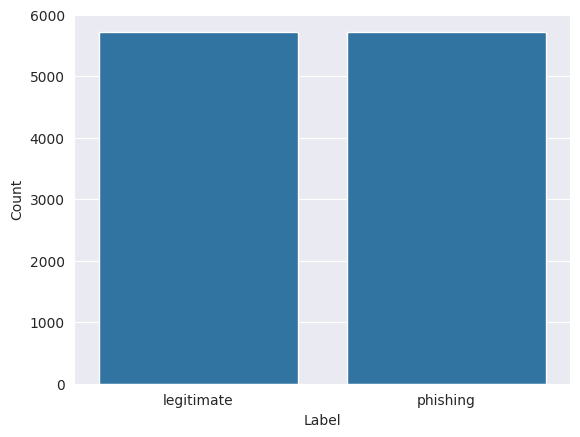

In [10]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Label')
plt.ylabel('Count')

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25312 (\N{CJK UNIFIED IDEOGRAPH-62E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20613 (\N{CJK UNIFIED IDEOGRAPH-5085}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


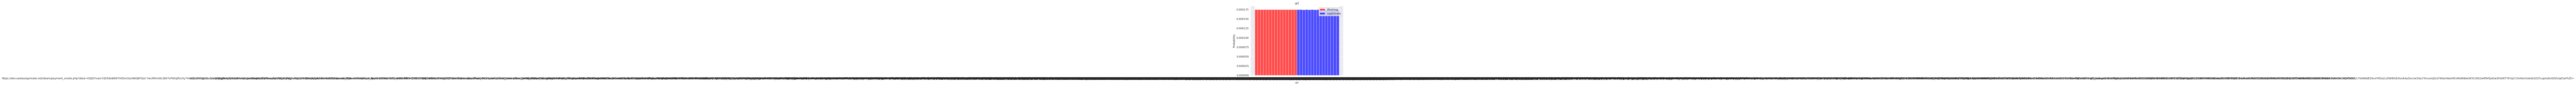

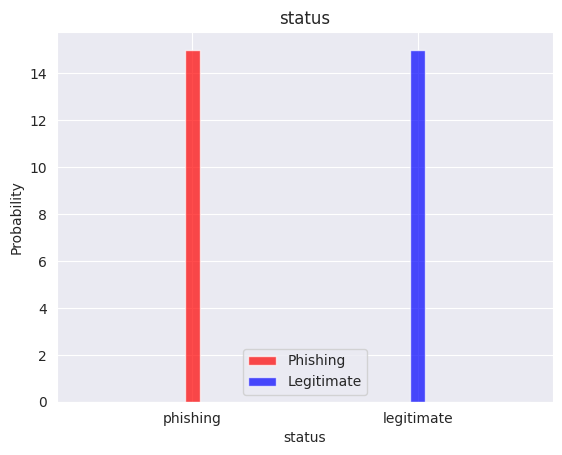

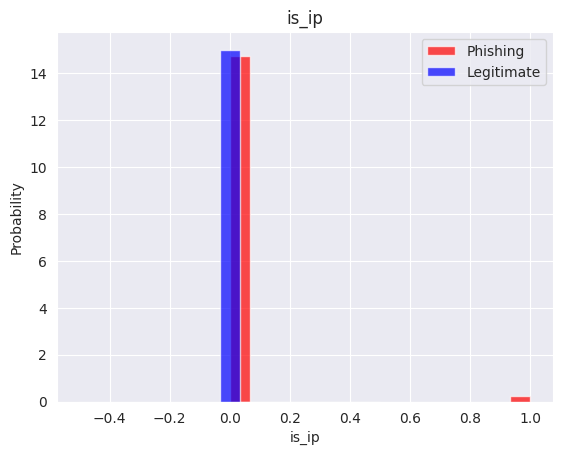

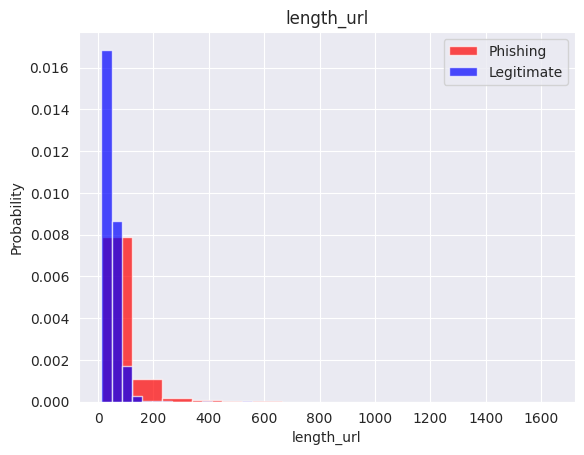

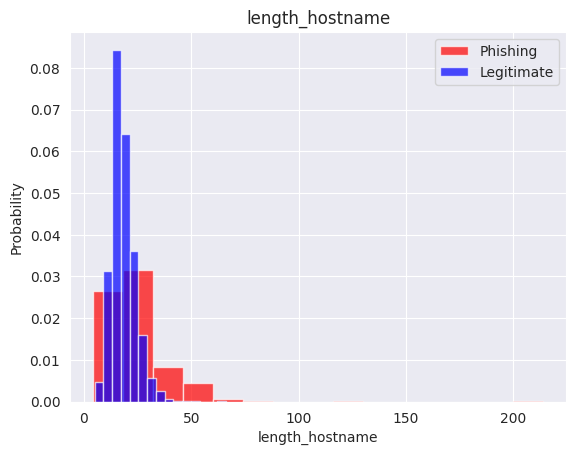

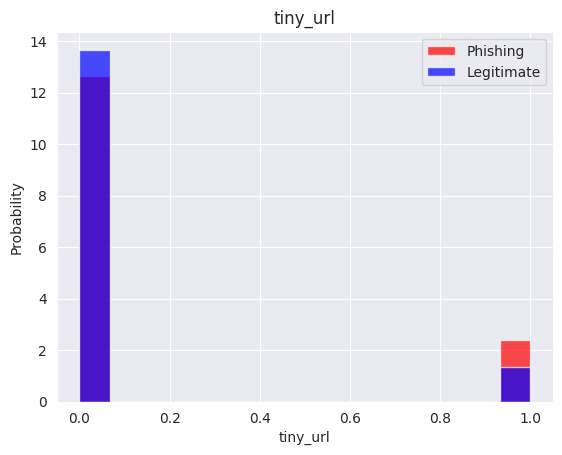

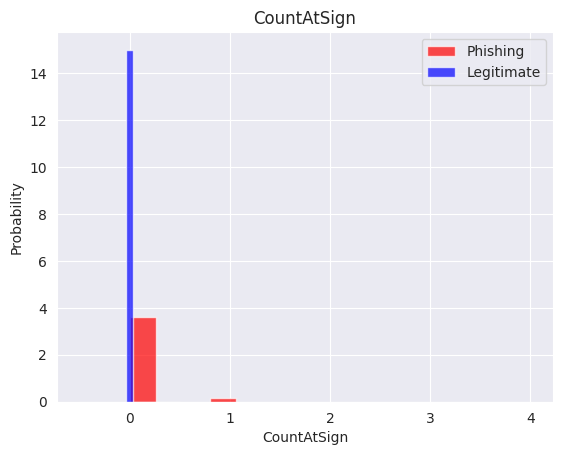

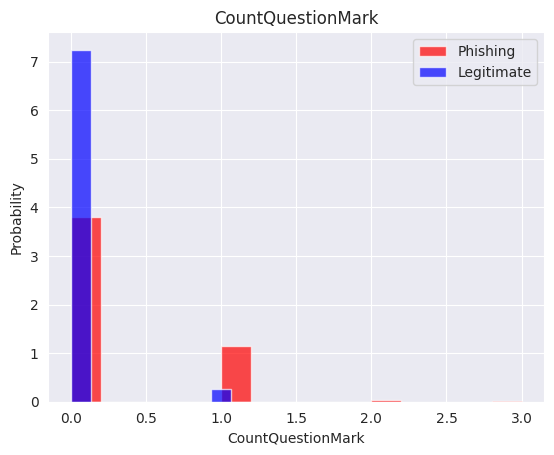

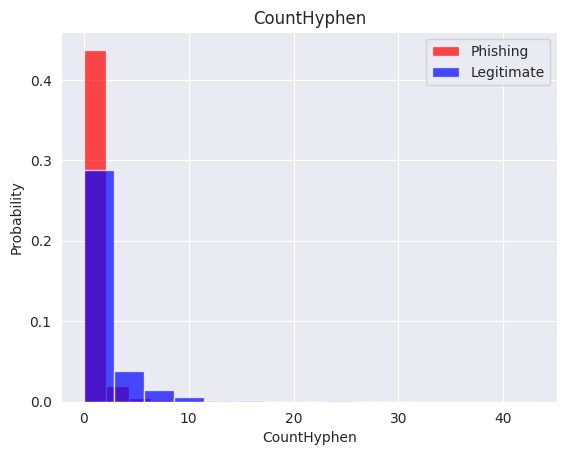

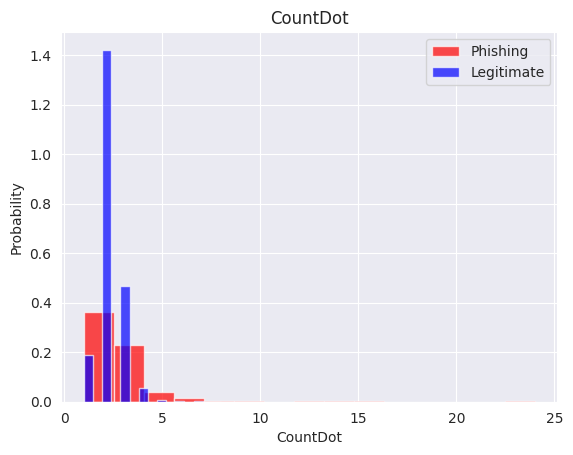

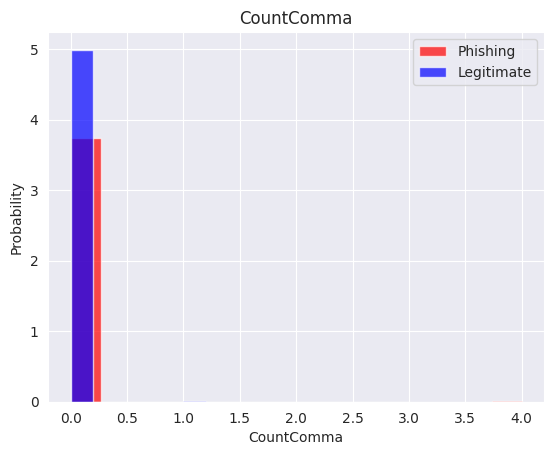

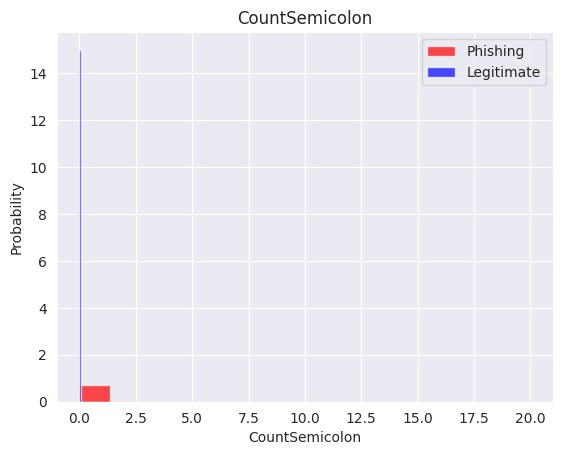

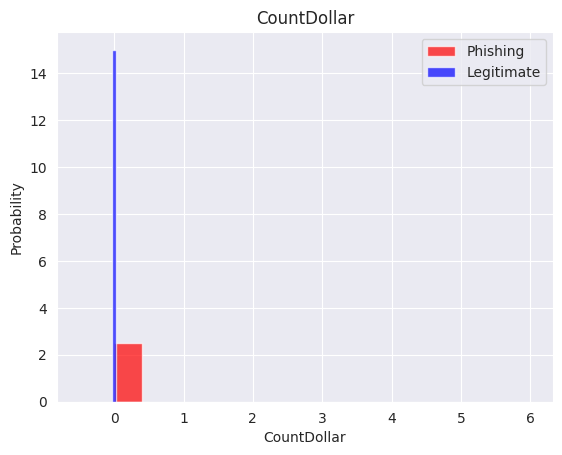

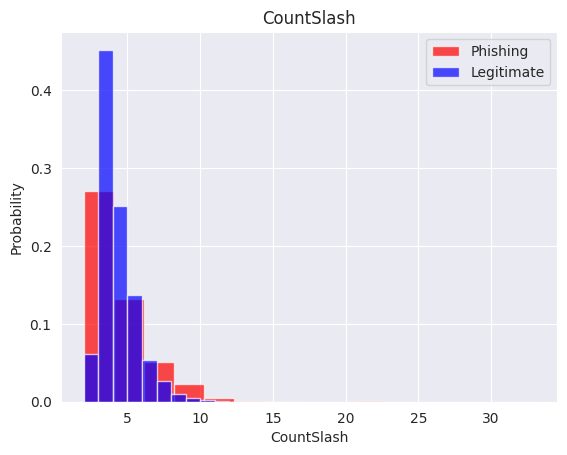

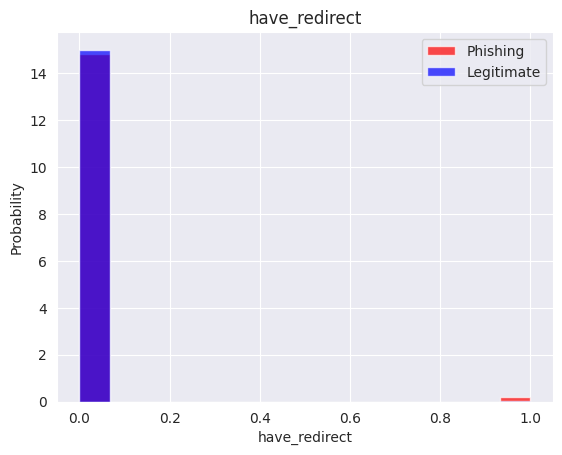

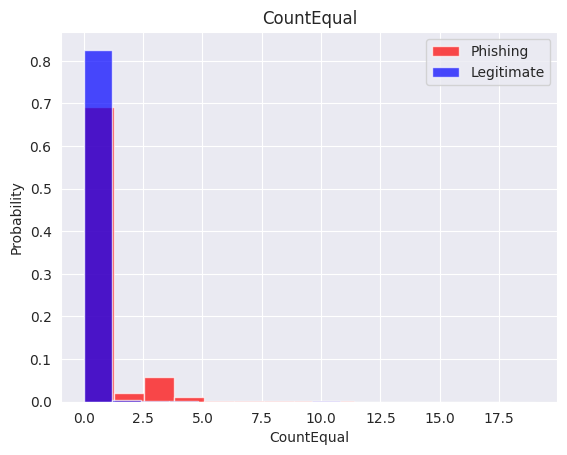

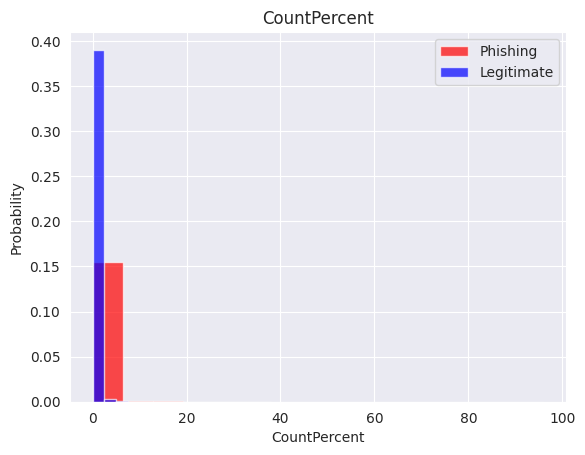

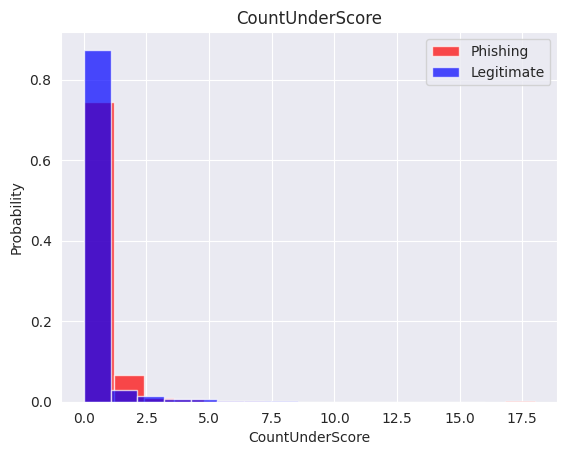

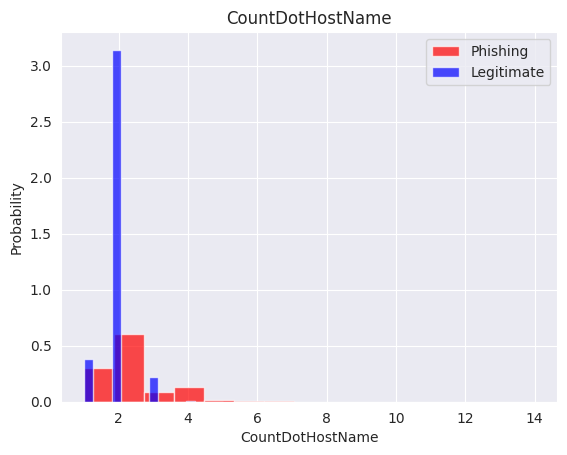

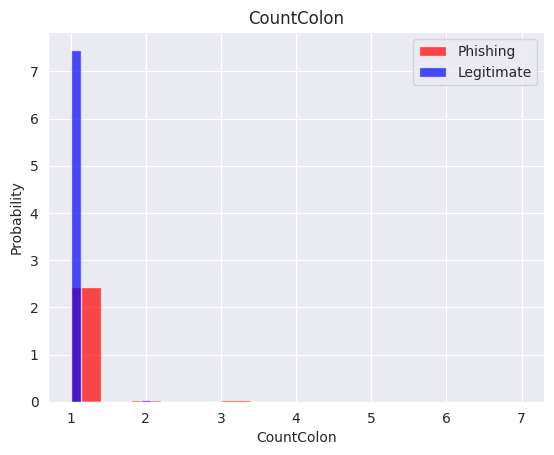

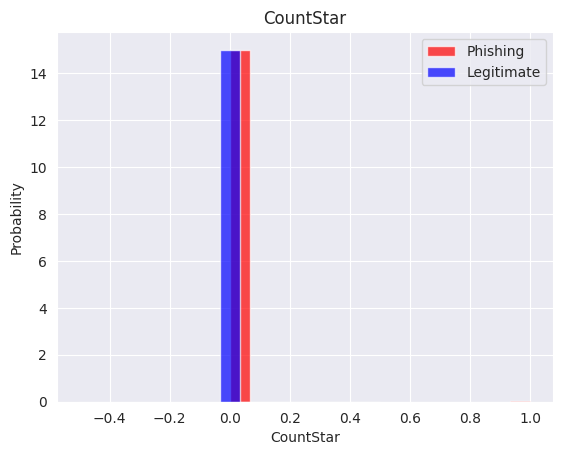

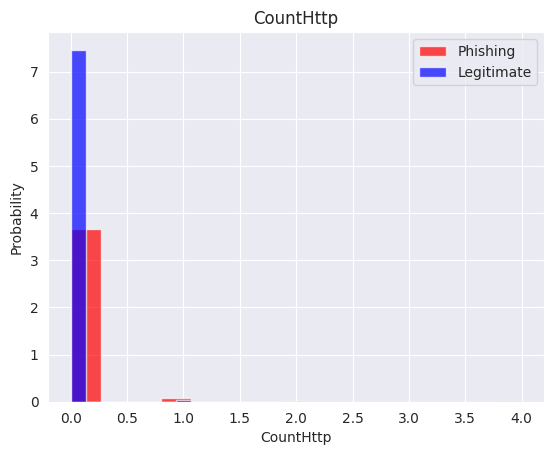

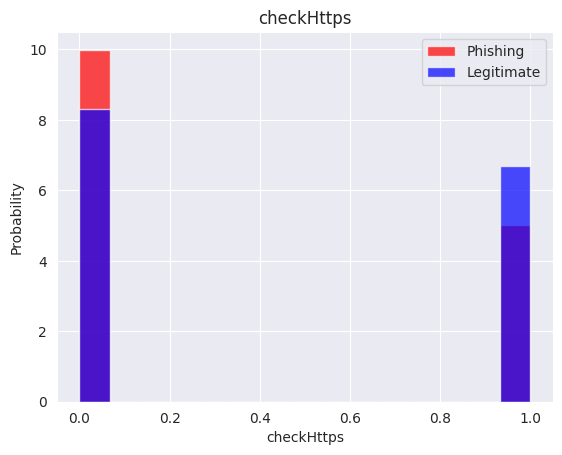

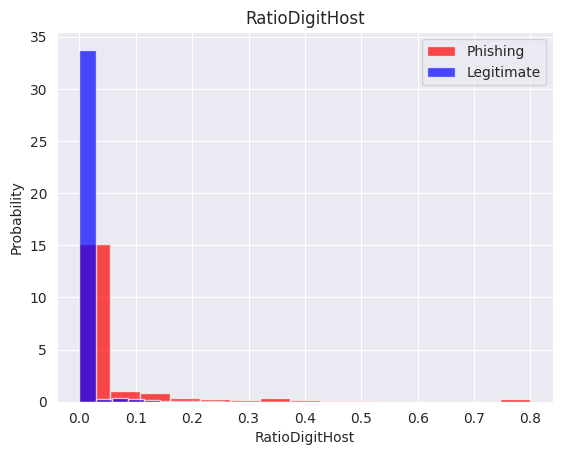

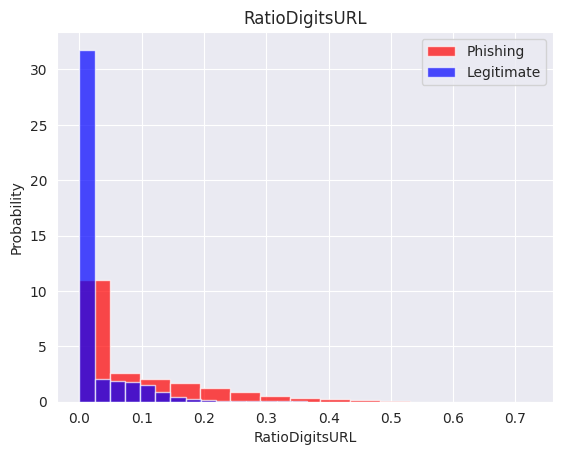

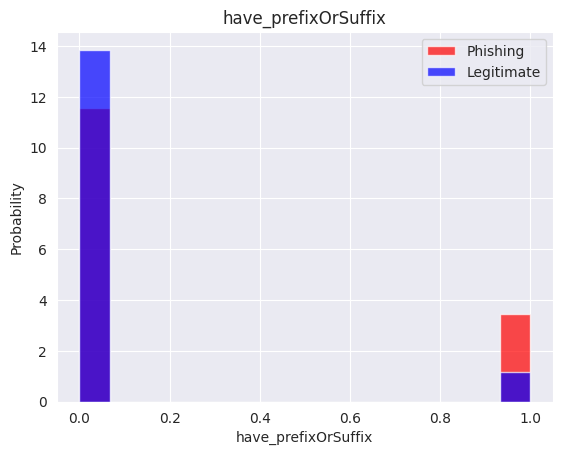

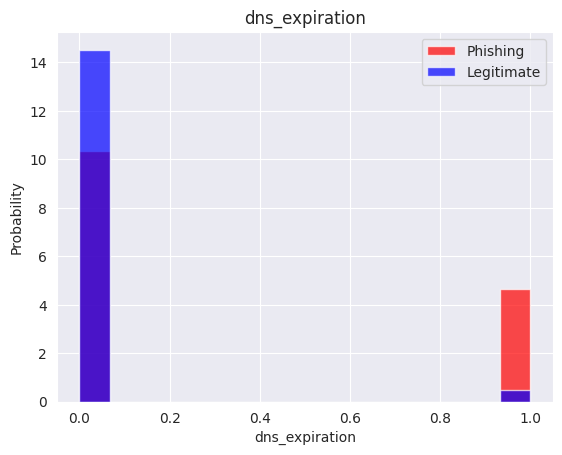

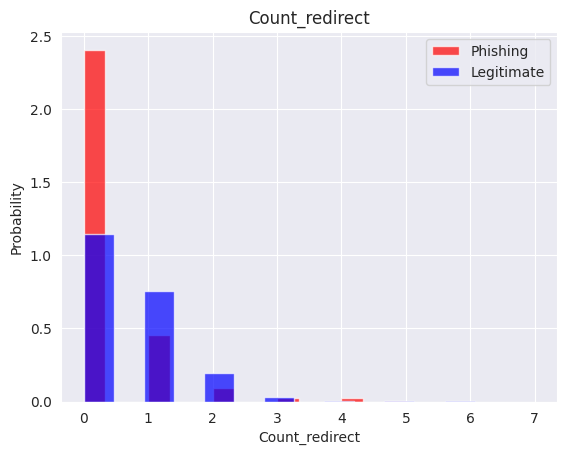

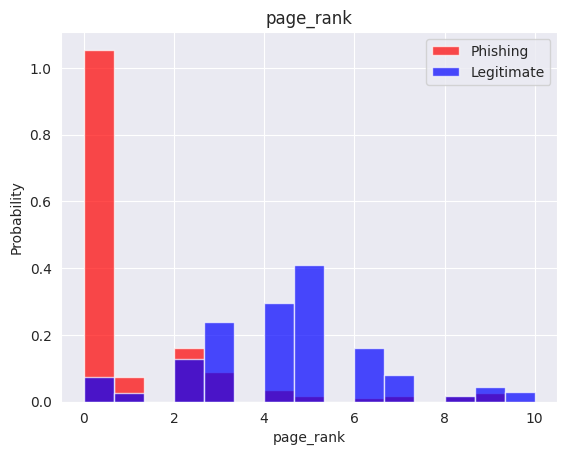

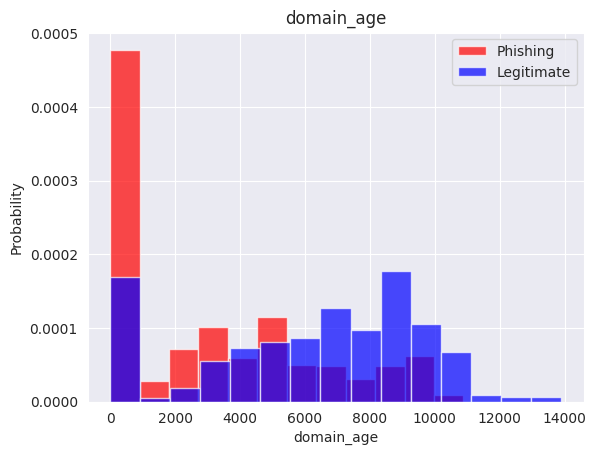

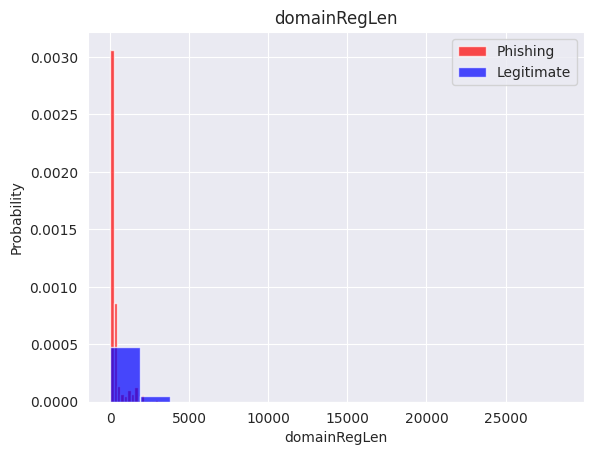

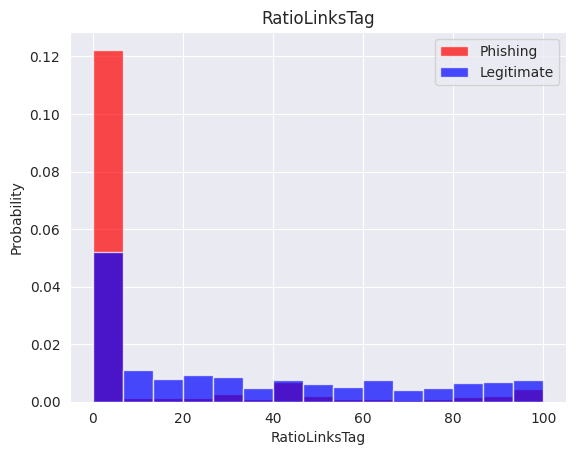

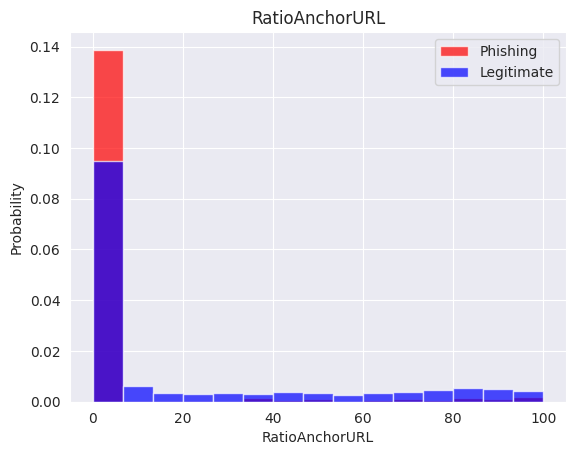

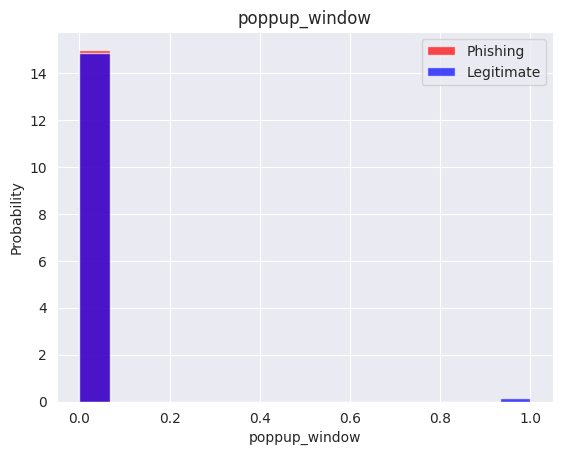

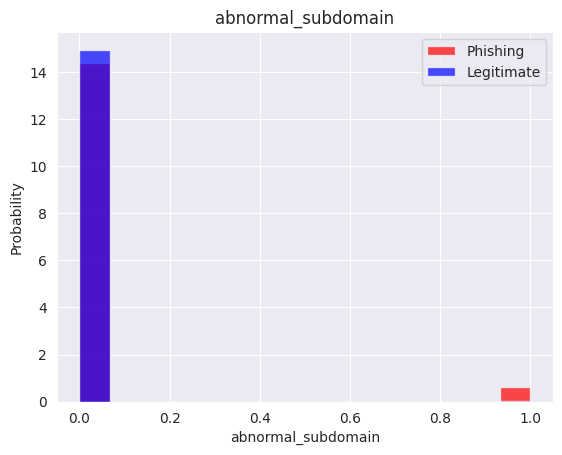

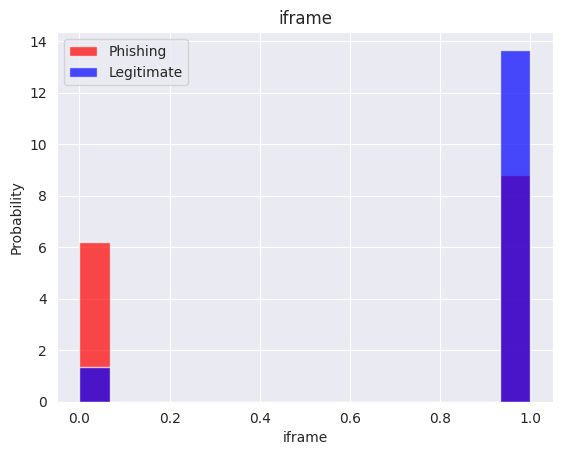

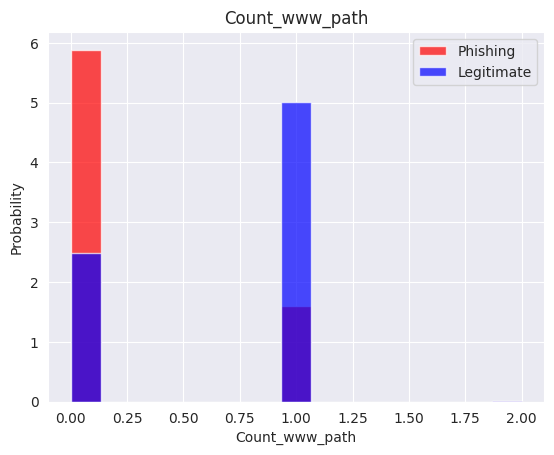

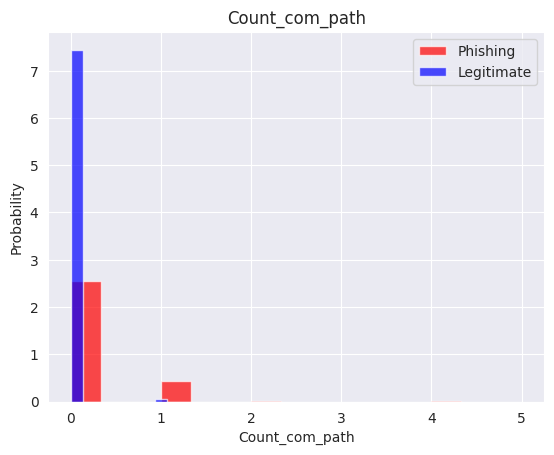

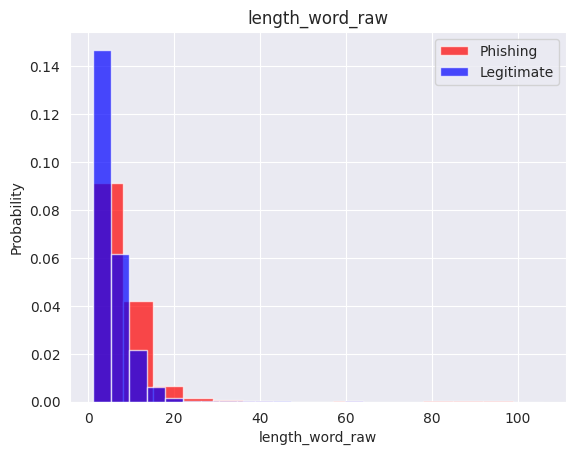

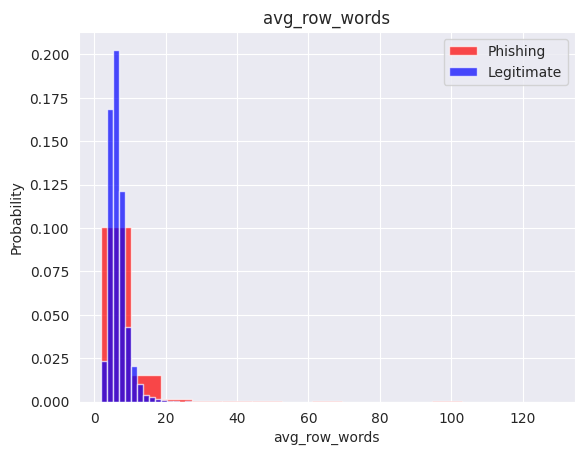

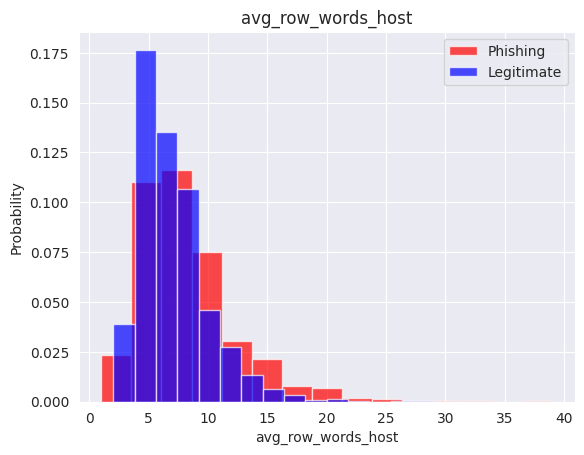

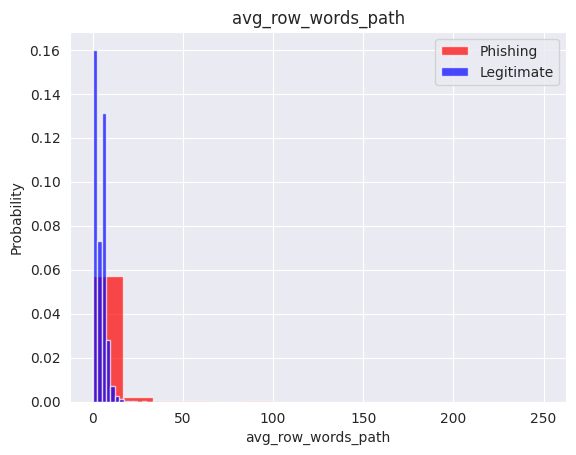

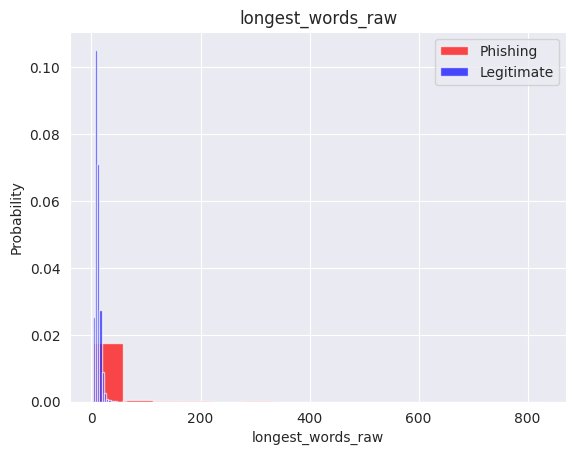

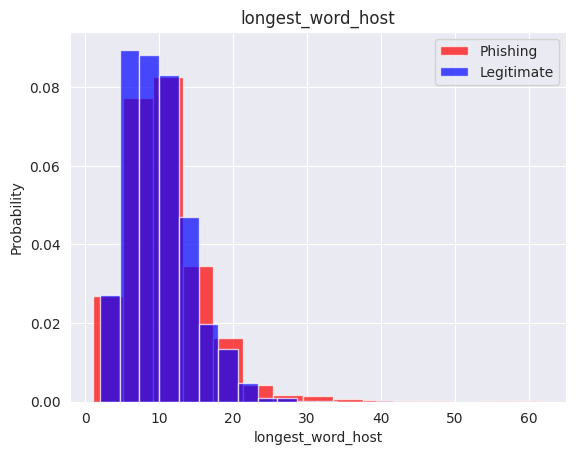

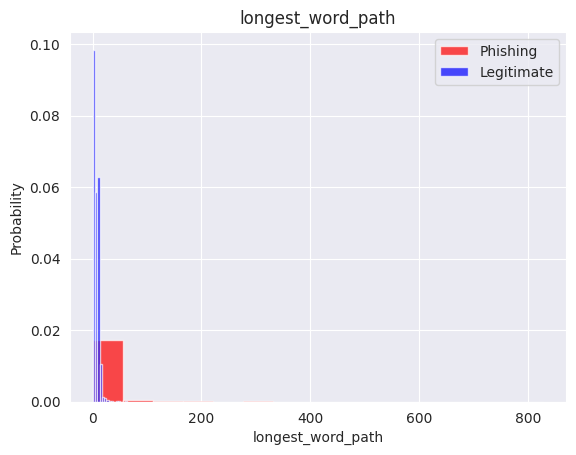

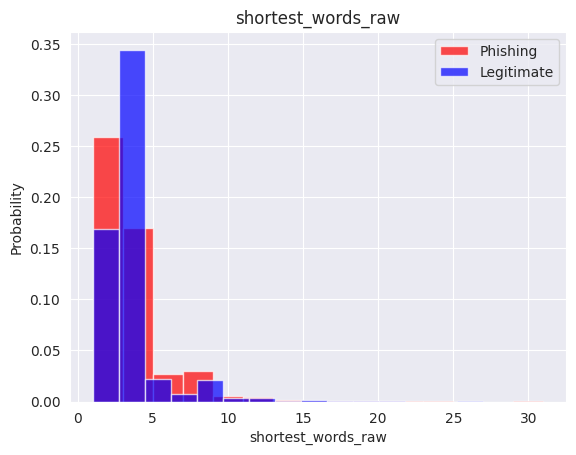

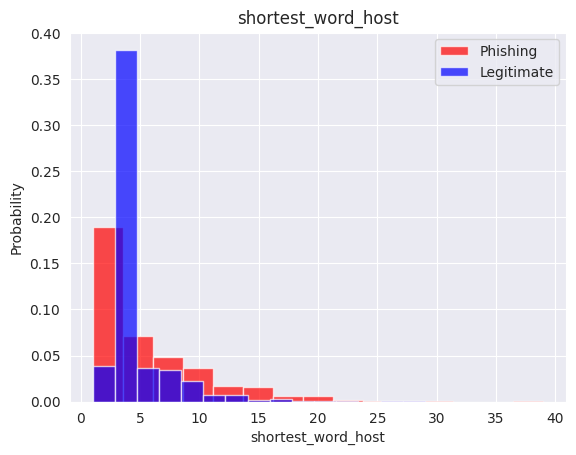

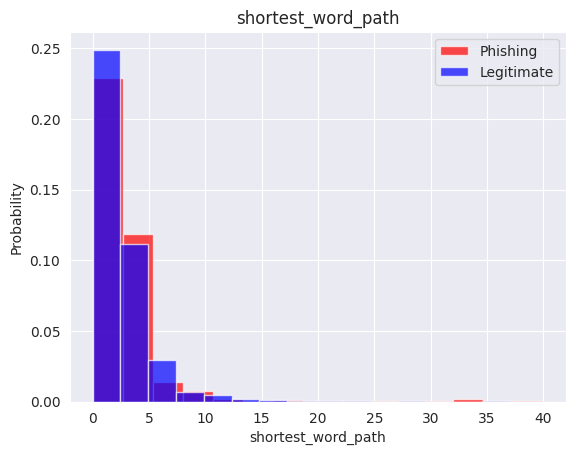

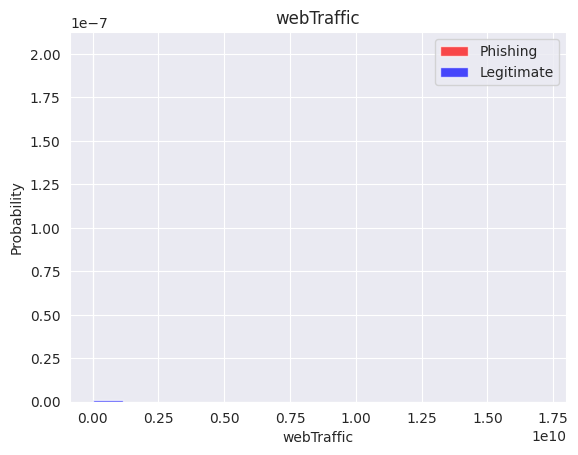

In [11]:
for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(data[data['status']=='phishing'][label], color='red', label="Phishing", alpha=0.7, density=True, bins=15)
  plt.hist(data[data['status']=='legitimate'][label], color='blue', label="Legitimate", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [11]:
data['status'] = data['status'].map({'phishing': 1, 'legitimate': 0})

In [25]:
X = data.drop(['url', 'status'], axis=1).values
y = data['status'].values

In [26]:
X

array([[  0.,  37.,  19., ...,   3.,   0.,   1.],
       [  0.,  77.,  23., ...,   2.,   0.,   1.],
       [  0., 126.,  50., ...,   2.,   0.,   1.],
       ...,
       [  0.,  92.,  19., ...,   4.,   0.,   1.],
       [  0., 178.,  15., ...,   1.,   0.,   1.],
       [  0.,  88.,  16., ...,   2.,   0.,   1.]])

In [27]:
y

array([0, 1, 1, ..., 1, 1, 0])

#Scale data

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
# fit scaler into data
scaler.fit(X)
# start scale
X = scaler.transform(X)


In [30]:
X 

array([[0.        , 0.01534684, 0.07142857, ..., 0.075     , 0.        ,
        1.        ],
       [0.        , 0.03990178, 0.09047619, ..., 0.05      , 0.        ,
        1.        ],
       [0.        , 0.06998158, 0.21904762, ..., 0.05      , 0.        ,
        1.        ],
       ...,
       [0.        , 0.04910988, 0.07142857, ..., 0.1       , 0.        ,
        1.        ],
       [0.        , 0.10190301, 0.05238095, ..., 0.025     , 0.        ,
        1.        ],
       [0.        , 0.04665439, 0.05714286, ..., 0.05      , 0.        ,
        1.        ]])

In [31]:
df = np.hstack((np.reshape(y, (-1, 1)), X))
transformed_df = pd.DataFrame(df, columns=data.columns[1:])

In [32]:
data1 = data.drop(['url', 'status'], axis=1)

0


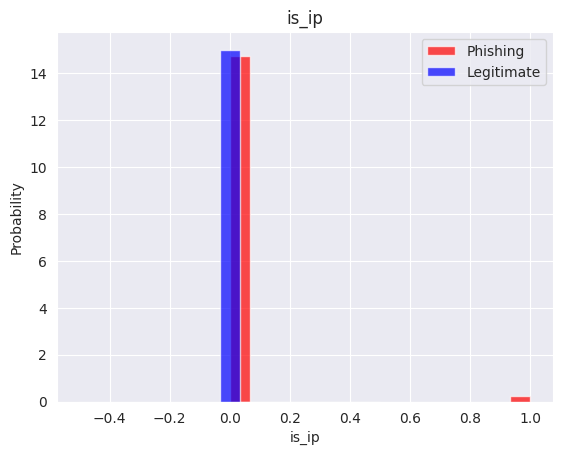

1


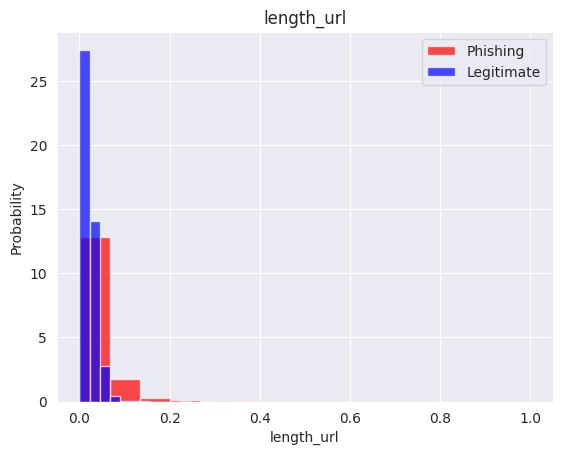

2


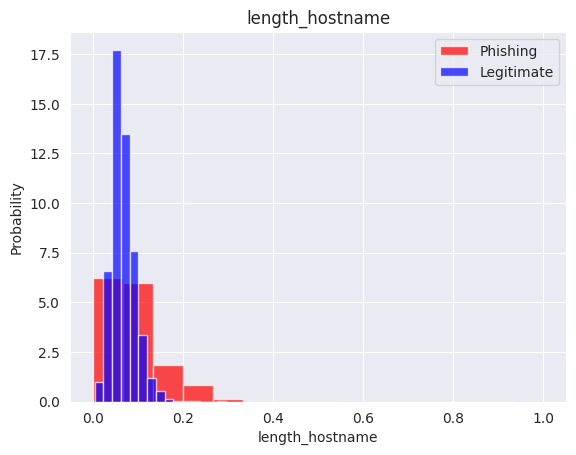

3


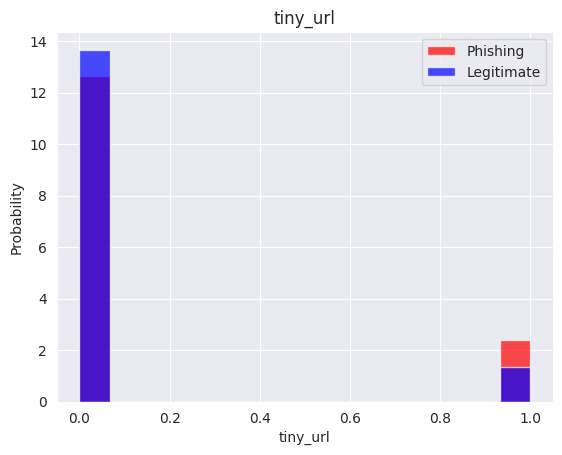

4


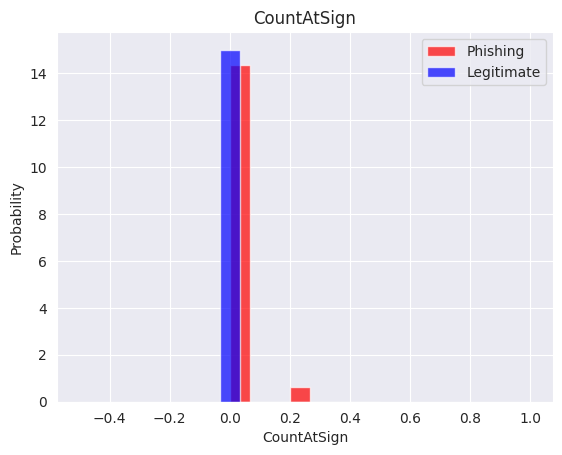

5


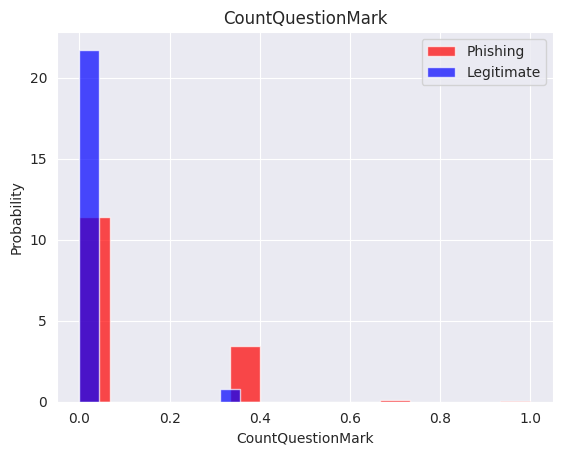

6


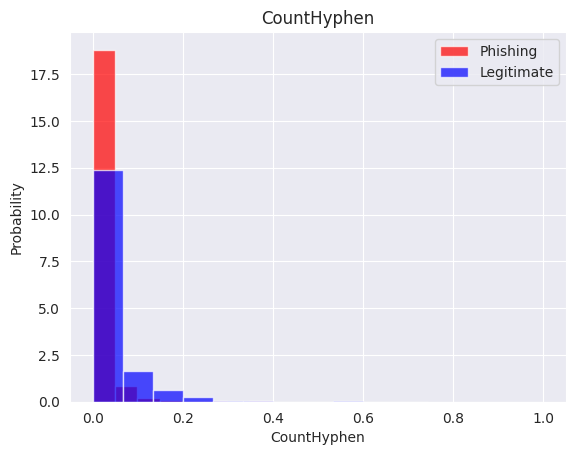

7


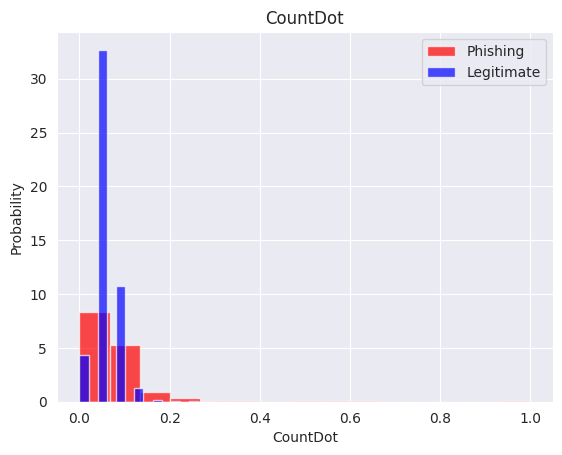

8


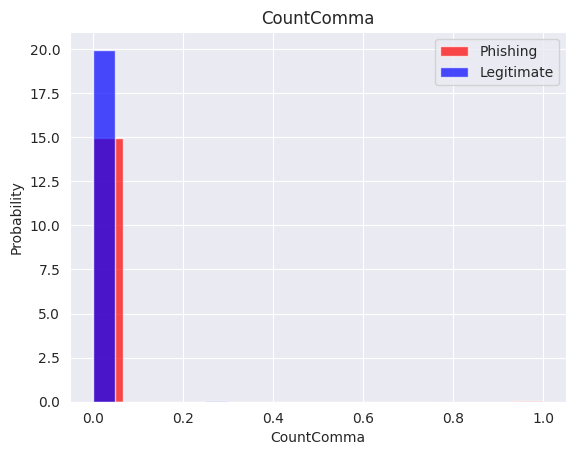

9


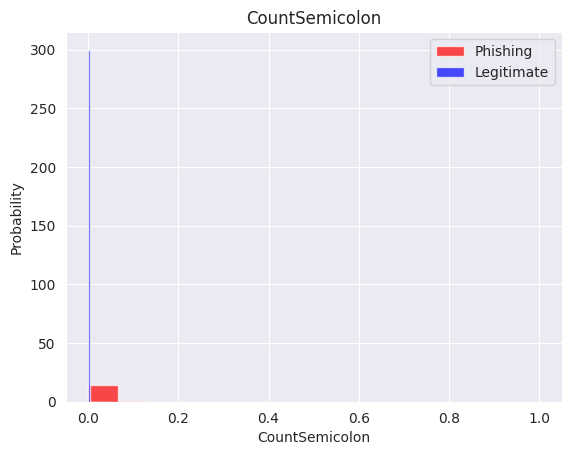

10


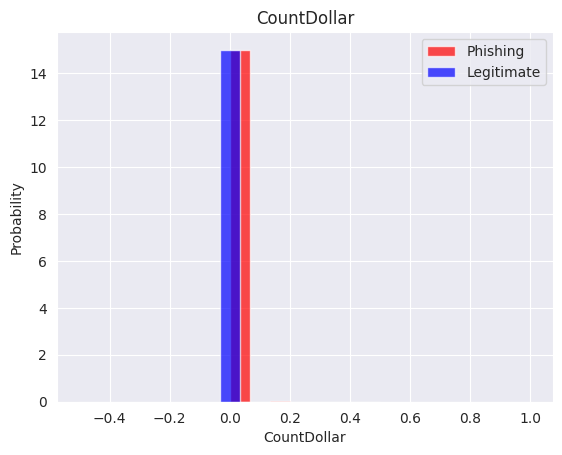

11


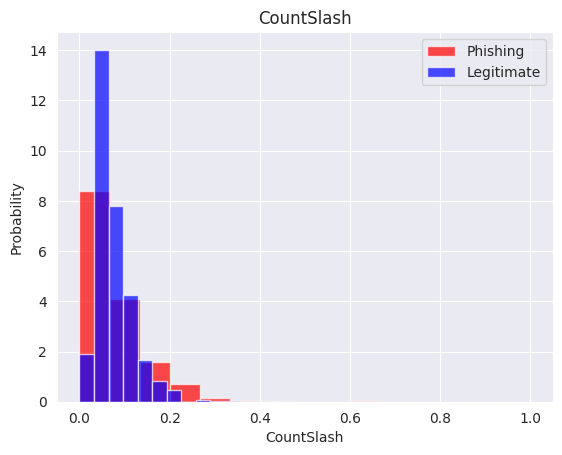

12


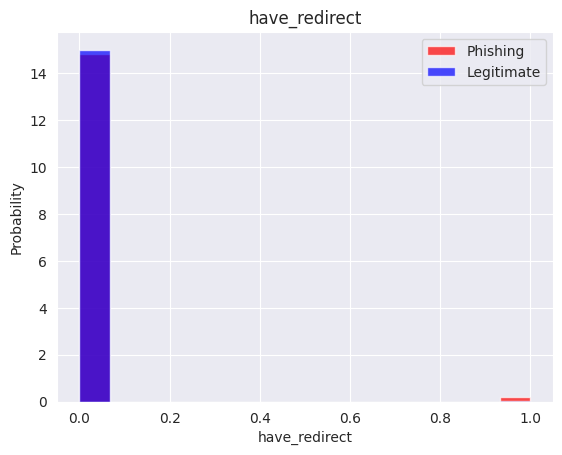

13


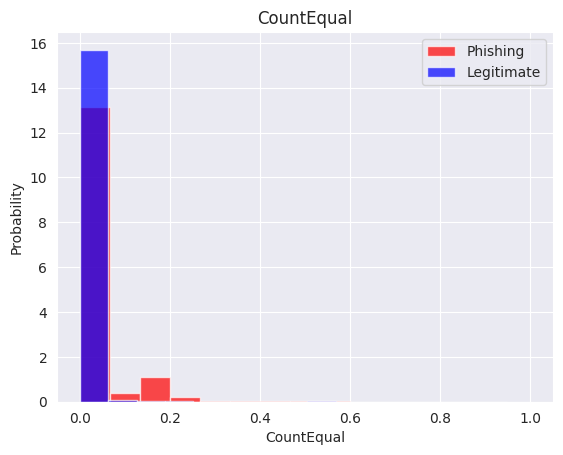

14


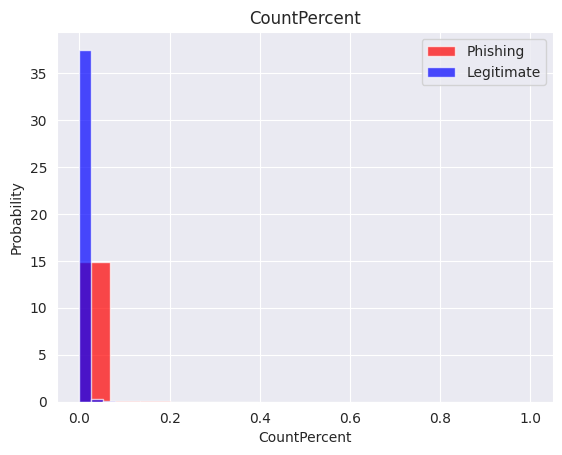

15


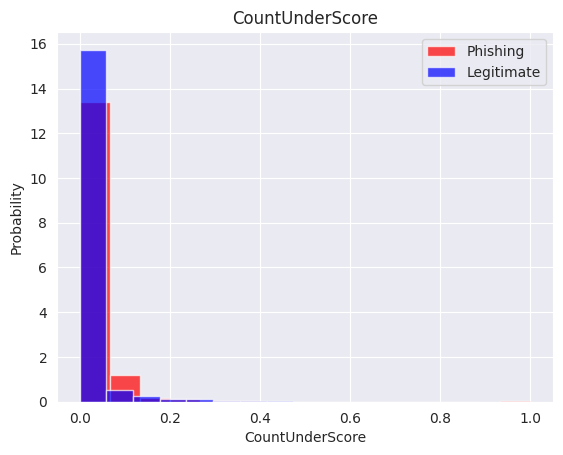

16


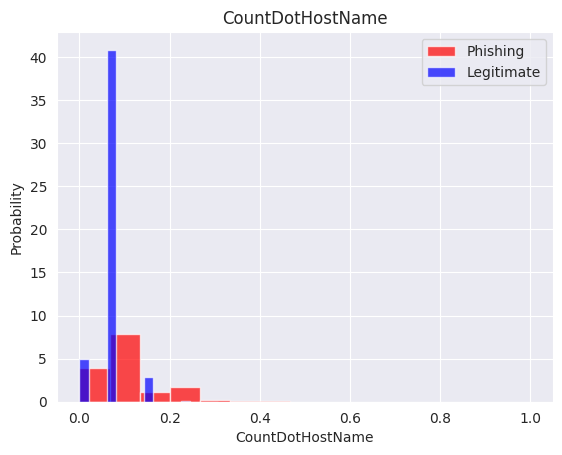

17


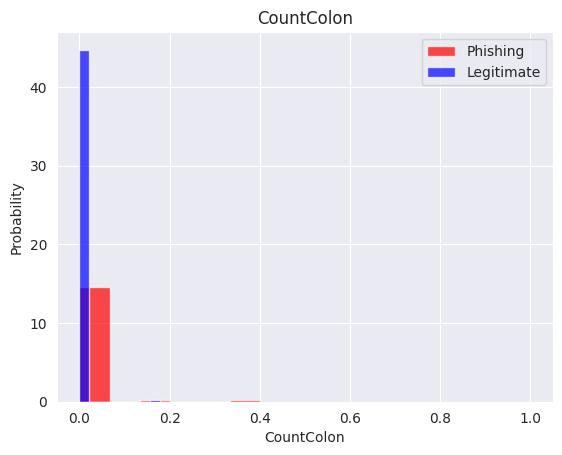

18


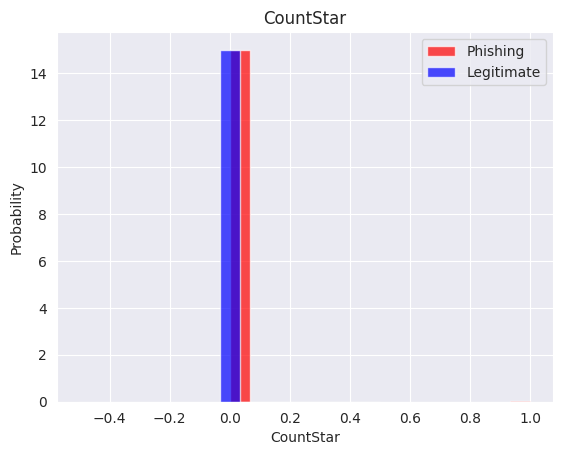

19


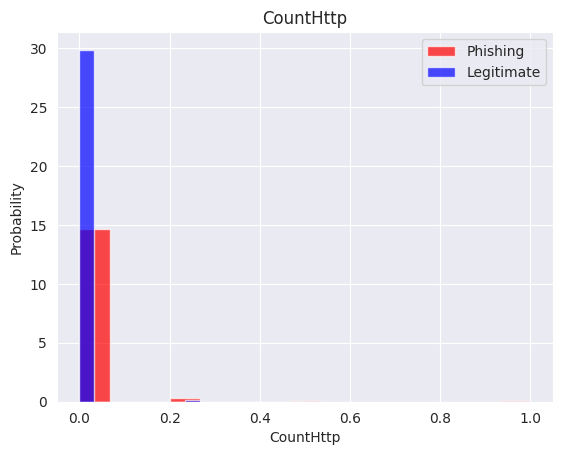

20


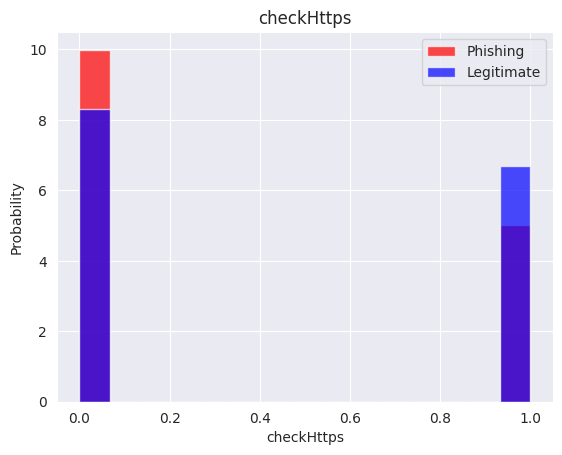

21


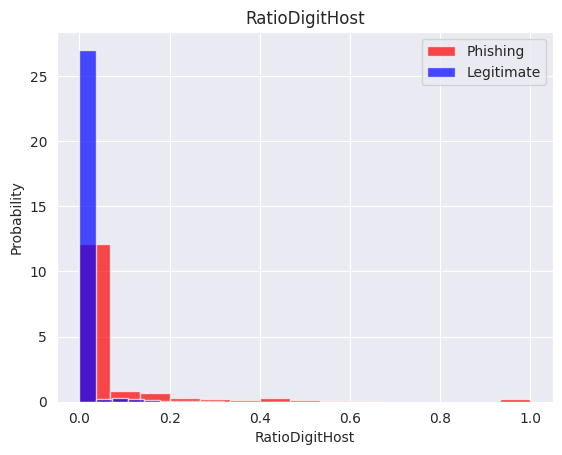

22


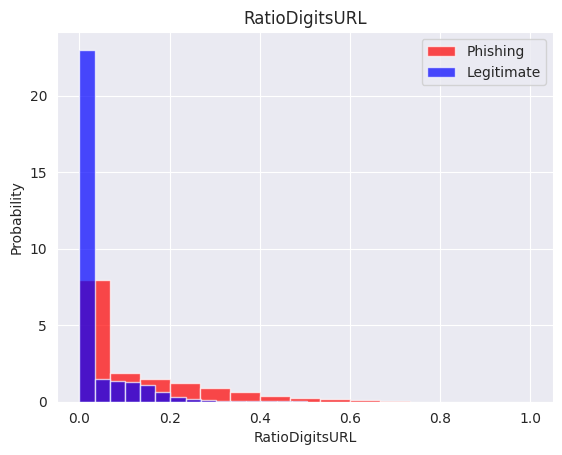

23


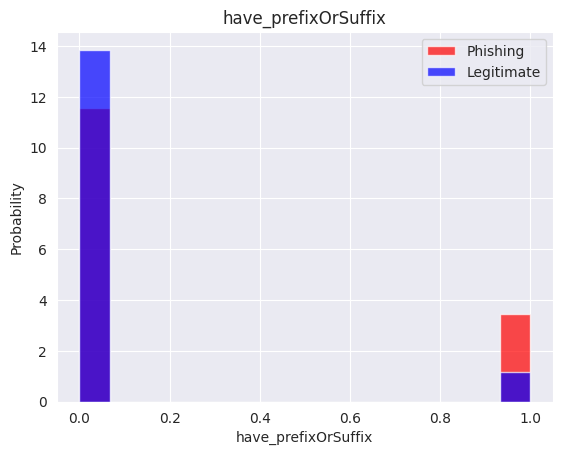

24


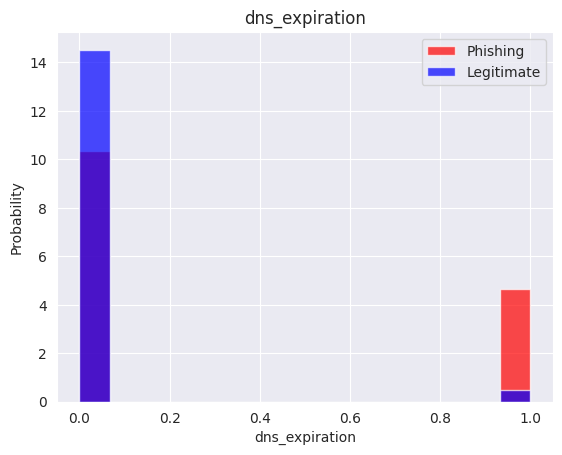

25


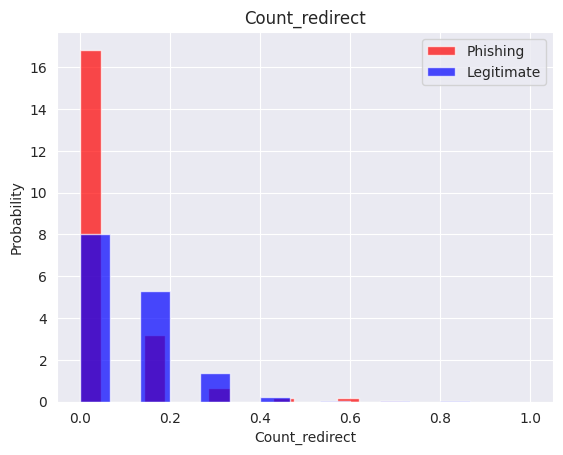

26


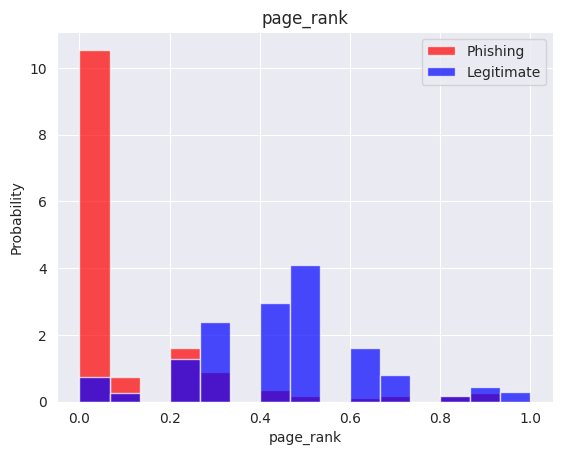

27


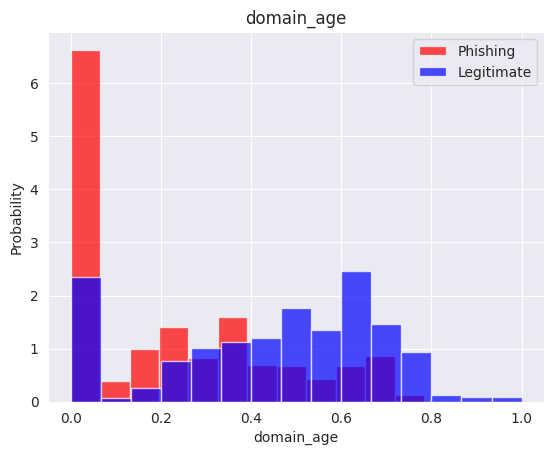

28


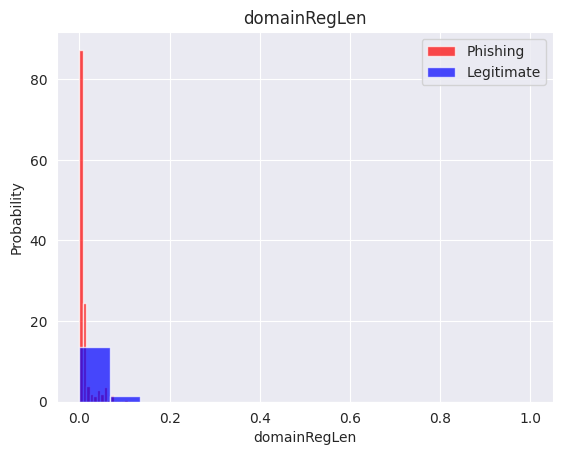

29


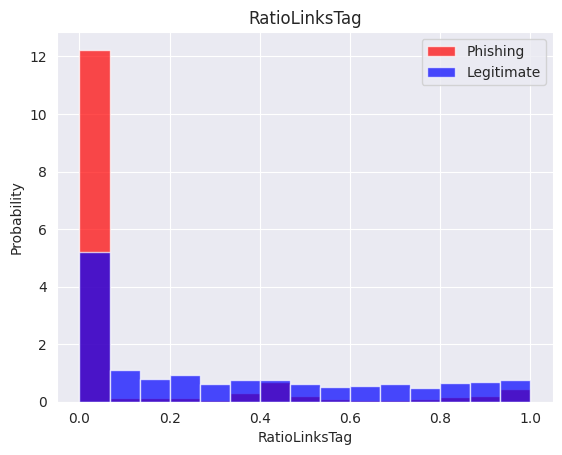

30


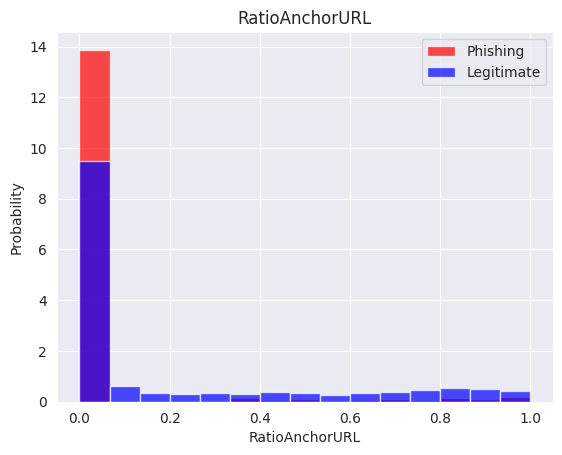

31


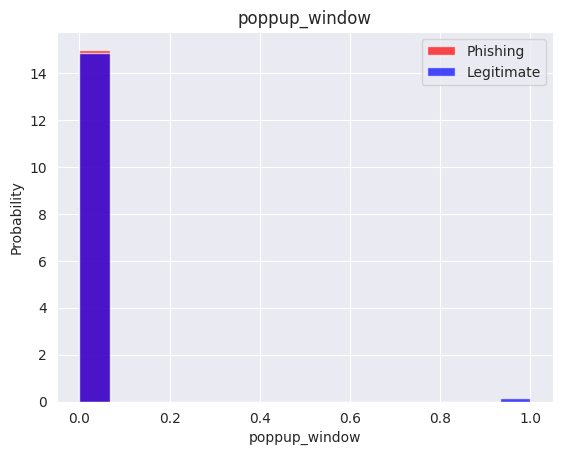

32


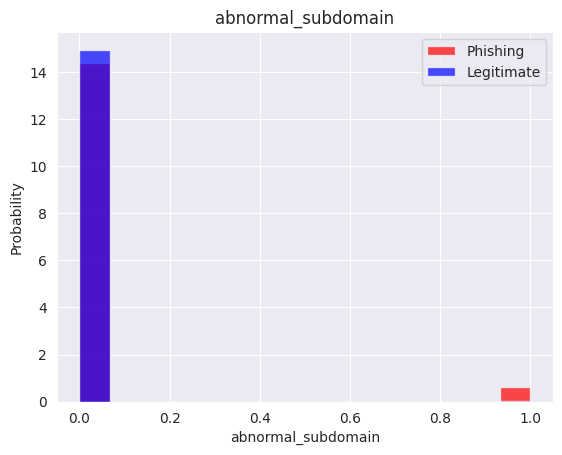

33


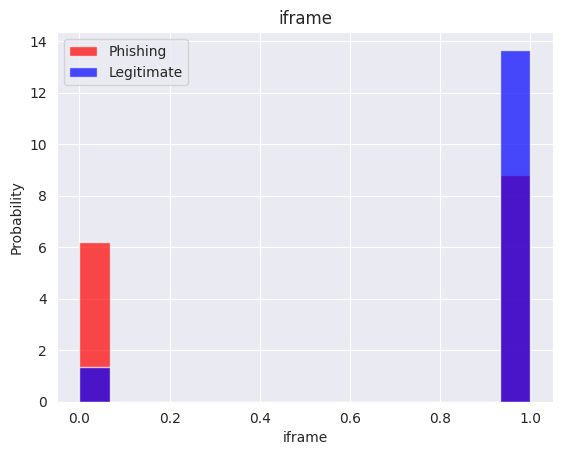

34


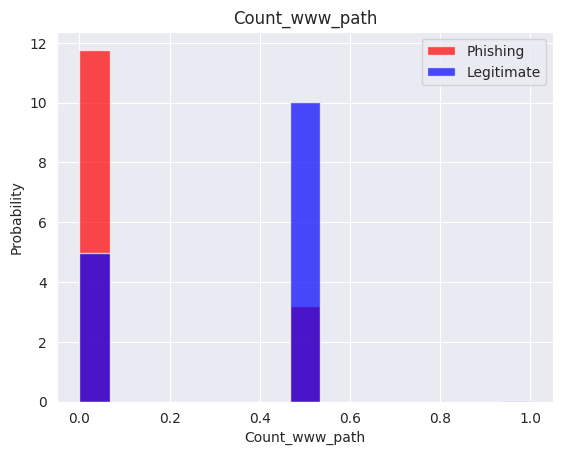

35


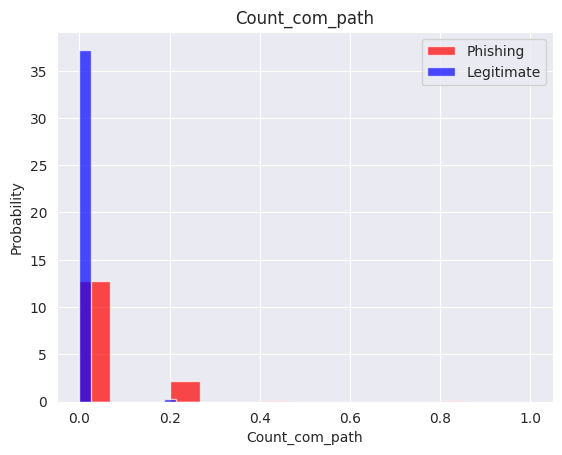

36


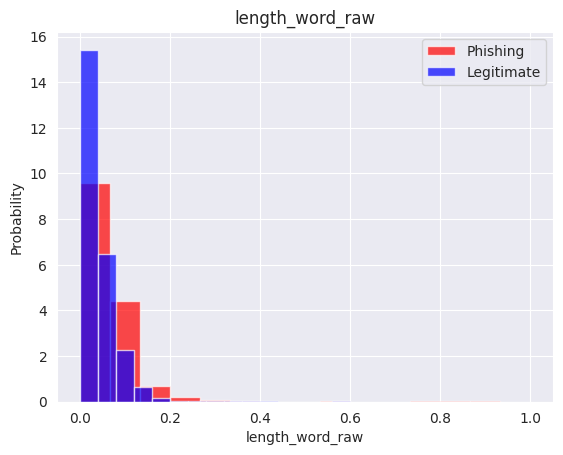

37


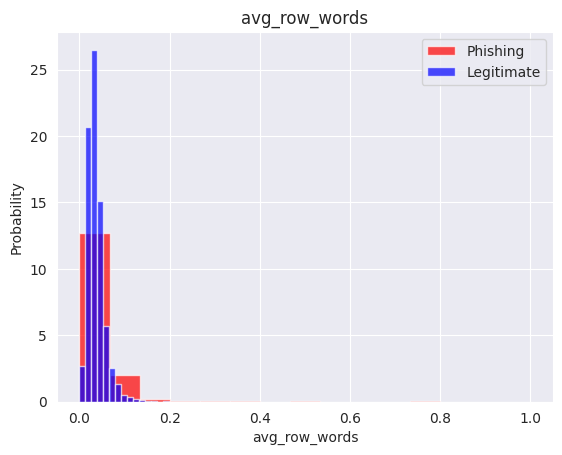

38


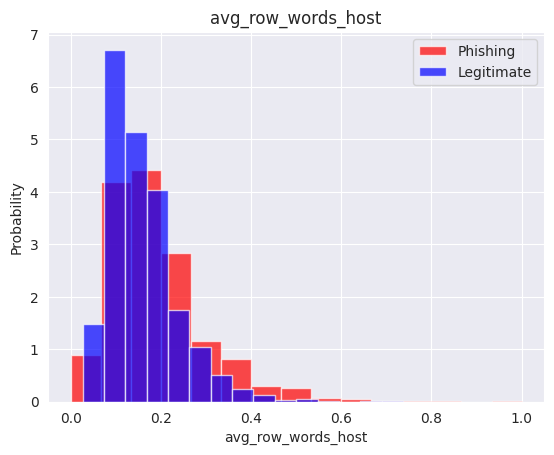

39


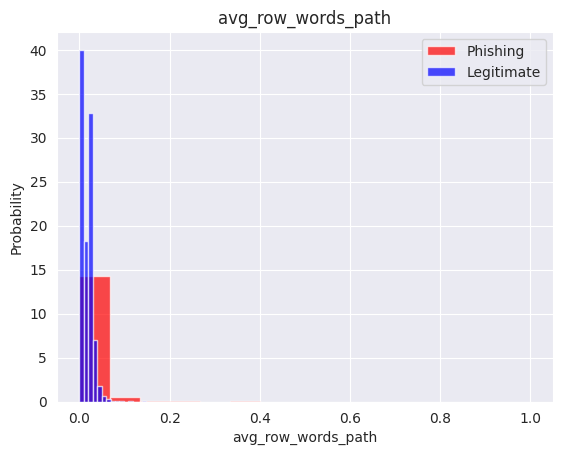

40


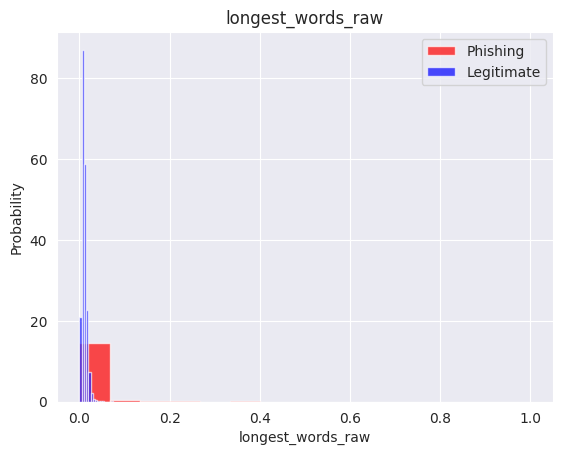

41


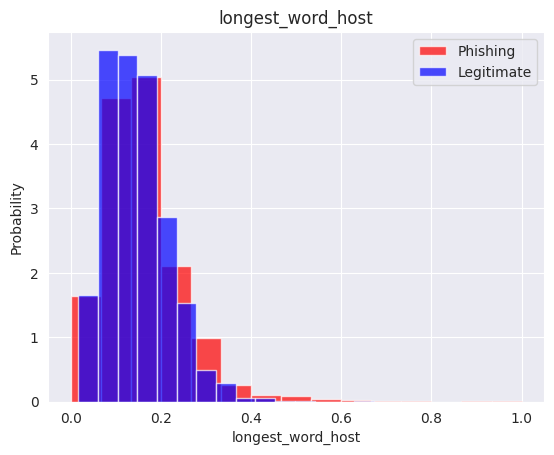

42


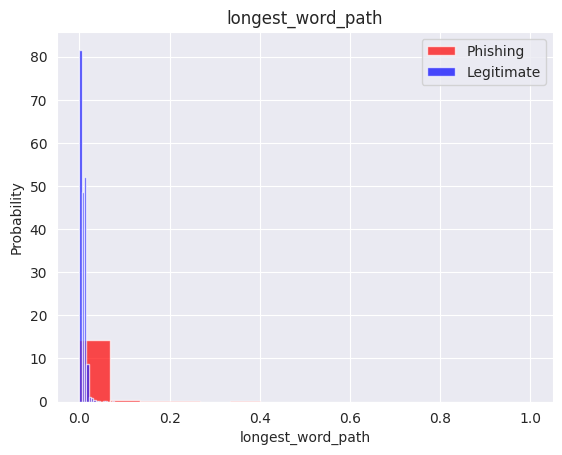

43


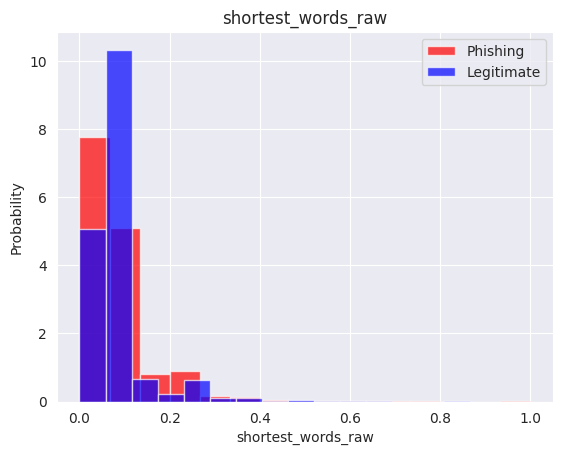

44


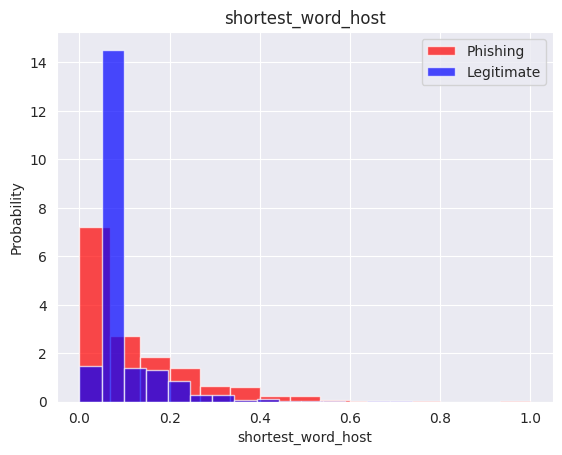

45


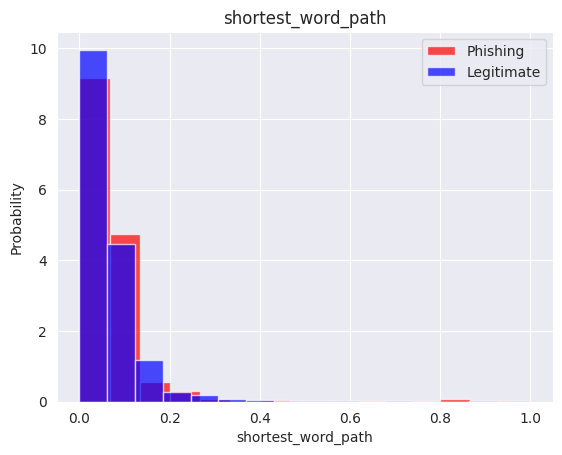

46


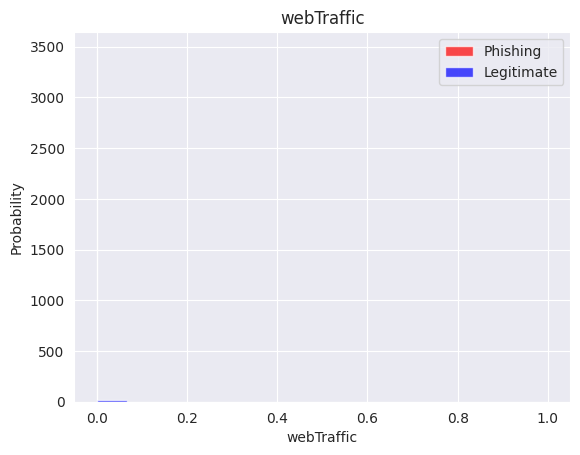

47


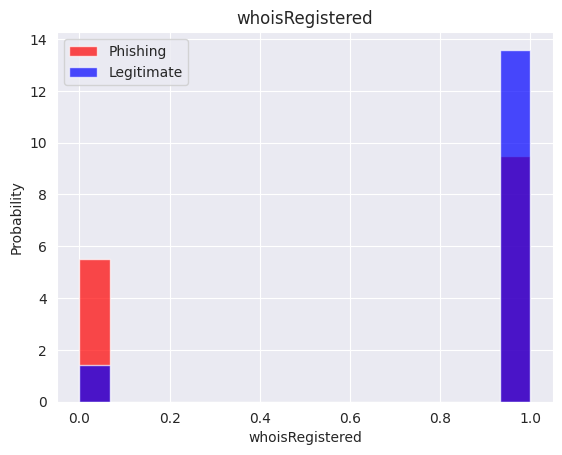

In [33]:
for i in range(len(data1.columns)):
  label = data1.columns[i]
  print(i)
  plt.hist(transformed_df[transformed_df['status']==1][label], color='red', label="Phishing", alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['status']==0][label], color='blue', label="Legitimate", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train

array([[0.        , 0.00613874, 0.05238095, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.03437692, 0.17619048, ..., 0.45      , 0.        ,
        0.        ],
       [0.        , 0.02332719, 0.05714286, ..., 0.075     , 0.        ,
        1.        ],
       ...,
       [0.        , 0.03990178, 0.01904762, ..., 0.05      , 0.        ,
        1.        ],
       [0.        , 0.02209945, 0.07619048, ..., 0.1       , 0.        ,
        1.        ],
       [0.        , 0.02148557, 0.08571429, ..., 0.05      , 0.        ,
        1.        ]])

In [36]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

#Store result

In [37]:
model_list = []
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

def set_result(model, acc, f1, recall, precision):
  model_list.append(model)
  accuracy_list.append(round(acc,3))
  f1_score_list.append(round(f1,3))
  recall_list.append(round(recall,3))
  precision_list.append(round(precision,3))

#Neural Network

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu')
mlp.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32))

In [39]:
mlp_pred = mlp.predict(X_test)

In [40]:
pd.DataFrame({'y_test': y_test, 'predict': mlp_pred})

,y_test,predict
0,0,0
1,0,1
2,1,1
3,1,1
4,1,0
...,...,...
2285,1,1
2286,1,1
2287,0,0
2288,1,1


In [41]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1120
           1       0.95      0.97      0.96      1170

    accuracy                           0.96      2290
   macro avg       0.96      0.96      0.96      2290
weighted avg       0.96      0.96      0.96      2290


In [64]:
acc_score_nn = accuracy_score(mlp_pred, y_test)
f1_score_nn = f1_score(mlp_pred, y_test)
recall_score_nn = recall_score(mlp_pred, y_test)
precision_score_nn = precision_score(mlp_pred, y_test)

In [65]:
set_result('NN', acc_score_nn, f1_score_nn, recall_score_nn, precision_score_nn)

#Random Forest

In [43]:
randomForest = RandomForestClassifier()
model_rf = randomForest.fit(X_train, y_train)

In [44]:
rf_predict = model_rf.predict(X_test)

In [45]:
pd.DataFrame({'y_test': y_test, 'predict': rf_predict})

,y_test,predict
0,0,0
1,0,1
2,1,1
3,1,1
4,1,0
...,...,...
2285,1,1
2286,1,1
2287,0,0
2288,1,1


In [46]:
acc_score_rf = accuracy_score(rf_predict, y_test)
f1_score_rf = f1_score(rf_predict, y_test)
recall_score_rf = recall_score(rf_predict, y_test)
precision_score_rf = precision_score(rf_predict, y_test)

In [47]:
print(classification_report(rf_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1129
           1       0.96      0.97      0.97      1161

    accuracy                           0.97      2290
   macro avg       0.97      0.97      0.97      2290
weighted avg       0.97      0.97      0.97      2290


In [48]:
set_result('RF', acc_score_rf, f1_score_rf, recall_score_rf, precision_score_rf)

#DescisionTree

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt_model = dt.fit(X_train, y_train)

In [51]:
dt_predict = dt_model.predict(X_test)

In [52]:
pd.DataFrame({'y_test': y_test, 'predict': dt_predict})

,y_test,predict
0,0,0
1,0,1
2,1,1
3,1,1
4,1,0
...,...,...
2285,1,1
2286,1,1
2287,0,0
2288,1,1


In [53]:
print(classification_report(dt_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1126
           1       0.94      0.94      0.94      1164

    accuracy                           0.94      2290
   macro avg       0.94      0.94      0.94      2290
weighted avg       0.94      0.94      0.94      2290


In [54]:
acc_score_dt = accuracy_score(dt_predict, y_test)
f1_score_dt = f1_score(dt_predict, y_test)
recall_score_dt = recall_score(dt_predict, y_test)
precision_score_dt = precision_score(dt_predict, y_test)

set_result('DT', acc_score_dt, f1_score_dt,
           recall_score_dt, precision_score_dt)

#Support vector machine

In [55]:
svc = SVC()
svc_model = svc.fit(X_train, y_train)

In [56]:
svm_predict = svc_model.predict(X_test)

In [57]:
pd.DataFrame({'y_test': y_test, 'predict': svm_predict})

,y_test,predict
0,0,0
1,0,0
2,1,1
3,1,1
4,1,0
...,...,...
2285,1,1
2286,1,1
2287,0,0
2288,1,1


In [58]:
print(classification_report(svm_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1148
           1       0.93      0.95      0.94      1142

    accuracy                           0.94      2290
   macro avg       0.94      0.94      0.94      2290
weighted avg       0.94      0.94      0.94      2290


In [59]:
acc_score_svm = accuracy_score(svm_predict, y_test)
f1_score_svm = f1_score(svm_predict, y_test)
recall_score_svm = recall_score(svm_predict, y_test)
precision_score_svm = precision_score(svm_predict, y_test)

set_result('SVM', acc_score_svm, f1_score_svm,
           recall_score_svm, precision_score_svm)

#Compare models


In [66]:
result = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'F1_Score': f1_score_list,
    'Recall': recall_list,
    'Precision': precision_list
})

In [67]:
result = result.sort_values(by=['Accuracy', 'F1_Score'], ascending=False).reset_index(drop=True)

In [68]:
result

,Model,Accuracy,F1_Score,Recall,Precision
0,RF,0.966,0.966,0.970,0.962
1,NN,0.960,0.961,0.955,0.968
2,DT,0.940,0.941,0.943,0.938
3,SVM,0.938,0.939,0.950,0.927


Text(0, 0.5, 'Accuracy')

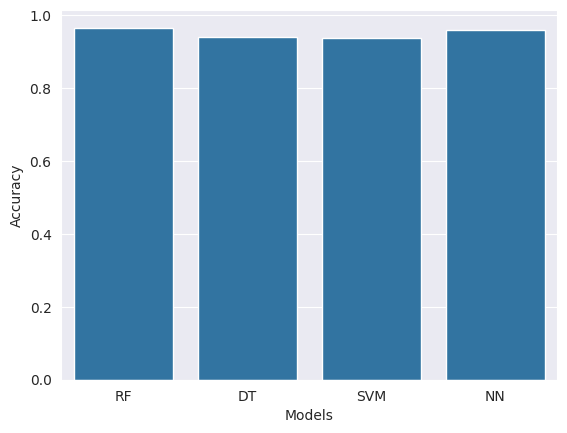

In [69]:
sns.barplot(x=model_list, y=accuracy_list)
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'F1_Score')

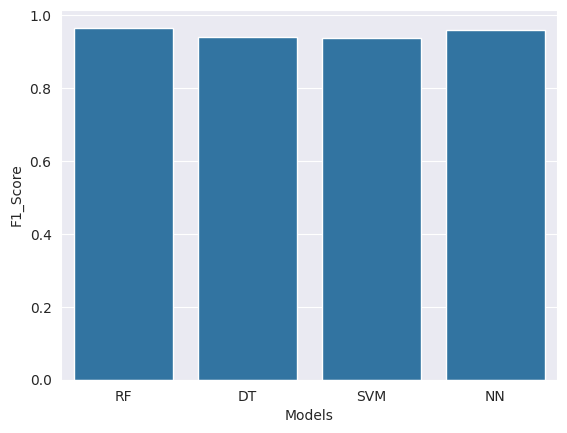

In [70]:
sns.barplot(x=model_list, y=f1_score_list)
plt.xlabel('Models')
plt.ylabel('F1_Score')

Text(0, 0.5, 'Recall')

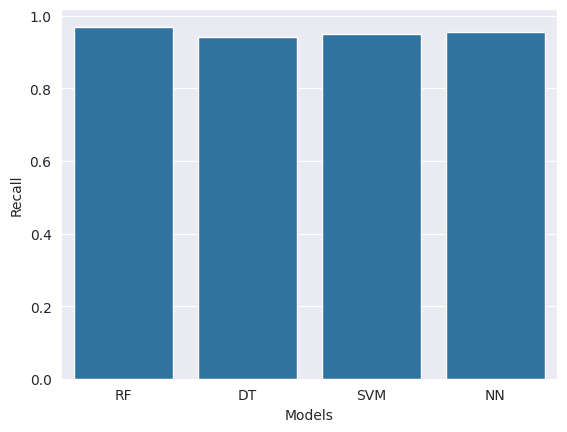

In [71]:
sns.barplot(x=model_list, y=recall_list)
plt.xlabel('Models')
plt.ylabel('Recall')

Text(0, 0.5, 'Precision')

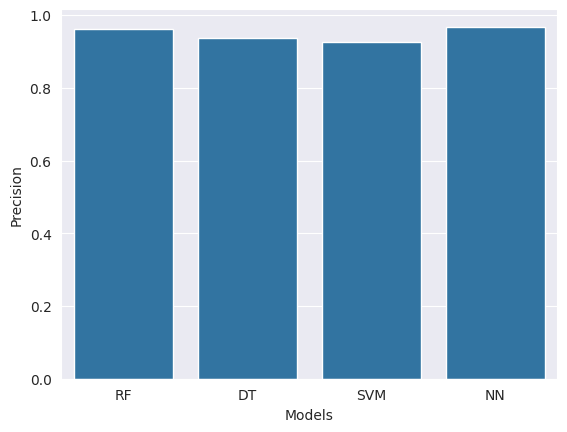

In [72]:
sns.barplot(x=model_list, y=precision_list)
plt.xlabel('Models')
plt.ylabel('Precision')

#Choose best model

In [73]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

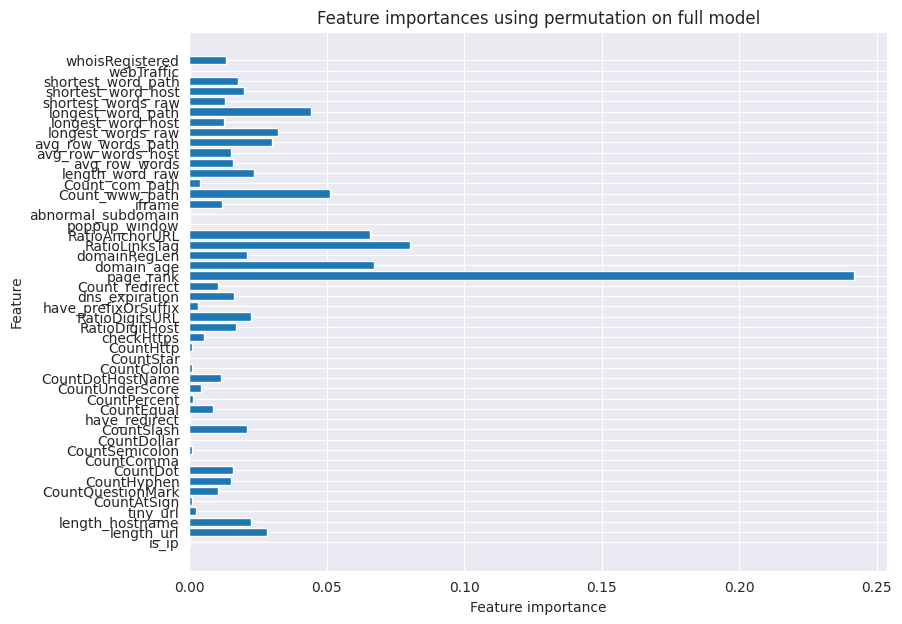

In [74]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), rf_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.columns[2:])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#Test

In [75]:
!pip install requests
!pip install python-whois

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.8 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [76]:
import features as fe
import whois
import requests
import re
from urllib.parse import urlparse
from datetime import datetime

In [77]:
from bs4 import BeautifulSoup


def create_vector(url):
  key = "wgowgcc4s4os0os8skw4wckw88s8wwkccwcsgcgg"
  flag = 1
  features = []
  response =""
  content =""
  text =""
  soup =""
  try:
    response = requests.get(url,timeout=5)
    content = response.content
    text = response.text
    soup = BeautifulSoup(response.text, 'html.parser')
  except:
    response = ""
    content =""
    text=""
    soup=""

  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    flag = 0
      
  features.append(fe.is_ip(url)),

  features.append(fe.length_url(url)),
  features.append(fe.length_hostname(url)),

  features.append(fe.tiny_url(url)),
  features.append(fe.countAtSign(url)),

  features.append(fe.countQuestionMark(url)),
  features.append(fe.countHyphen(url)),

  features.append(fe.countDot(url)),
  features.append(fe.countComma(url)),

  features.append(fe.countSemicolon(url)),
  features.append(fe.countDollar(url)),

  features.append(fe.countSlash(url)),
  features.append(fe.have_redirect(url)),

  features.append(fe.CountEqual(url)),
  features.append(fe.CountPercent(url)),

  features.append(fe.CountUnderScore(url)),
  features.append(fe.CountDotHostName(url)),

  features.append(fe.CountColon(url)),
  features.append(fe.CountStar(url)),

  features.append(fe.CountHttp(url)),
  features.append(fe.check_https_protocol(url)),

  features.append(fe.RatioDigitsInHostname(url)),
  features.append(fe.RatioDigitsURL(url)),

  features.append(fe.have_prefixOrSuffix(url)),
  features.append(fe.dns_expiration(url)),

  features.append(fe.web_forwarding(response)),
  features.append(fe.page_rank(key,url)),

  features.append(0 if flag==0 else fe.DomainAge(domain_name)),
  features.append(0 if flag==0 else fe.DomainRegLen(domain_name)),
  features.append(fe.LinksInScriptTags(soup,url)),
  features.append(fe.AnchorURL(soup,url)),
  features.append(fe.popup_window(content)),
  features.append(fe.abnormal_subdomain(url)),
  features.append(fe.iframe(text)),


  features.append(fe.count_www_path(url)),
  features.append(fe.count_com_path(url)),
  features.append(fe.length_word_raw(url)),

  features.append(fe.average_word_length(fe.raw_words(url))),
  features.append(fe.average_word_length(fe.raw_words_host(url))),
  features.append(fe.average_word_length(fe.raw_words_path(url))),

  features.append(fe.longest_word_length(fe.raw_words(url))),
  features.append(fe.longest_word_length(fe.raw_words_host(url))),
  features.append(fe.longest_word_length(fe.raw_words_path(url))),

  features.append(fe.shortest_word_length(fe.raw_words(url))),
  features.append(fe.shortest_word_length(fe.raw_words_host(url))),
  features.append(fe.shortest_word_length(fe.raw_words_path(url))),
  features.append(fe.web_traffic(url)),
  features.append(fe.whois_registered_domain(url))
  
  return features


In [78]:
columns =[
  'is_ip',
  'length_url',
  'length_hostname',
  'tiny_url',
  'CountAtSign',
  'CountQuestionMark',
  'CountHyphen',
  'CountDot',
  'CountComma',
  'CountSemicolon',
  'CountDollar',
  'CountSlash',
  'have_redirect',
  'CountEqual',
  'CountPercent',
  'CountUnderScore',
  'CountDotHostName',
  'CountColon',
  'CountStar',
  'CountHttp',
  'checkHttps',
  'RatioDigitHost',
  'RatioDigitsURL',
  'have_prefixOrSuffix',
  'dns_expiration',
  'Count_redirect',
  'page_rank',
  'domain_age',
  'domainRegLen',
  'RatioLinksTag',
  'RatioAnchorURL',
  'poppup_window',
  'abnormal_subdomain',
  'iframe',
  'Count_www_path',
  'Count_com_path',
  'length_word_raw',
  'avg_row_words',
  'avg_row_words_host',
  'avg_row_words_path',
  'longest_words_raw',
  'longest_word_host',
  'longest_word_path',
  'shortest_words_raw',
  'shortest_word_host',
  'shortest_word_path',
  'webTraffic',
  'whoisRegistered',

]

In [79]:
url = ['https://www.google.com/', 'http://205.174.165.80/CICDataset/ISCX-URL-2016/',
       'https://kotaku.com/the-witcher-3-wild-hunt-the-kotaku-review-1703766283',
       'http://docs.python.org:80/3/library/urllib.parse.html?',

       	'https://usps.address-shipwatchers.shop/',
       'https://grtakeprize.com/it/bp4f/index?c=2277&affId=BC6DC089&c1=48&c2=1opCaODZewbK&c3=1c1e607843434706847313349c7444a0&c4=&c7=&c5=&c8=&c6=&i1=&t1=',
       'https://t.ly/EWZo9','http://fis-lab.com/wp-includes/images/smilies/front/wwpp/',
       
       'https://www.kaggle.com/busrabetulcavusoglu/', 'https://www.tdtu.edu.vn']

In [80]:
import re
from urllib.parse import urlparse
import urllib
from datetime import datetime, date
import time
import requests

In [81]:
url_list = []
for i in url:
  url_list.append(create_vector(i))

Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [82]:
df = pd.DataFrame(url_list, columns= columns)

In [83]:
df

,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,CountComma,CountSemicolon,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,0,23,14,0,0,0,0,2,0,0,...,4.500000,0.000000,6,6,0,3,3,0,1107210325,1
1,1,47,14,0,0,0,2,3,0,0,...,2.750000,4.000000,10,3,10,2,2,2,0,0
2,0,71,10,0,0,0,8,1,0,0,...,6.000000,4.888889,10,6,10,1,6,1,2074472,1
3,0,54,15,0,0,1,0,4,0,0,...,5.000000,4.600000,7,6,7,1,4,1,12225752,1
4,0,39,30,0,0,0,1,2,0,0,...,7.666667,0.000000,12,12,0,4,4,0,0,1
5,0,145,15,0,0,1,0,1,0,0,...,11.000000,4.750000,32,11,32,1,11,1,0,1
6,0,18,4,0,0,0,0,1,0,0,...,1.000000,5.000000,5,1,5,1,1,5,600140,1
7,0,57,11,0,0,0,2,1,0,0,...,3.000000,5.333333,8,3,8,2,3,2,0,0
8,0,43,14,0,0,0,0,2,0,0,...,4.500000,19.000000,19,6,19,3,3,19,1711869,1
9,0,23,15,0,0,0,0,3,0,0,...,3.500000,0.000000,4,4,0,3,3,0,25847,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_ip                10 non-null     int64  
 1   length_url           10 non-null     int64  
 2   length_hostname      10 non-null     int64  
 3   tiny_url             10 non-null     int64  
 4   CountAtSign          10 non-null     int64  
 5   CountQuestionMark    10 non-null     int64  
 6   CountHyphen          10 non-null     int64  
 7   CountDot             10 non-null     int64  
 8   CountComma           10 non-null     int64  
 9   CountSemicolon       10 non-null     int64  
 10  CountDollar          10 non-null     int64  
 11  CountSlash           10 non-null     int64  
 12  have_redirect        10 non-null     int64  
 13  CountEqual           10 non-null     int64  
 14  CountPercent         10 non-null     int64  
 15  CountUnderScore      10 non-null     int64 

In [66]:
df.isna().sum()

is_ip                  0
length_url             0
length_hostname        0
tiny_url               0
CountAtSign            0
CountQuestionMark      0
CountHyphen            0
CountDot               0
CountComma             0
CountSemicolon         0
CountDollar            0
CountSlash             0
have_redirect          0
CountEqual             0
CountPercent           0
CountUnderScore        0
CountDotHostName       0
CountColon             0
CountStar              0
CountHttp              0
checkHttps             0
RatioDigitHost         0
RatioDigitsURL         0
have_prefixOrSuffix    0
dns_expiration         0
Count_redirect         0
page_rank              0
domain_age             0
domainRegLen           0
RatioLinksTag          0
RatioAnchorURL         0
poppup_window          0
abnormal_subdomain     0
iframe                 0
Count_www_path         0
Count_com_path         0
length_word_raw        0
avg_row_words          0
avg_row_words_host     0
avg_row_words_path     0


In [84]:
df = scaler.fit_transform(df)

#Predict

In [85]:
rf_predict = rf_model.predict(df)

In [86]:
result = rf_predict.tolist()

In [87]:
result

[0, 1, 1, 1, 1, 1, 1, 1, 0, 0]

In [88]:
combine = {'url': url, 'predict': result}

In [89]:
df_predict = pd.DataFrame(combine)

In [90]:
df_predict

,url,predict
0,https://www.google.com/,0
1,http://205.174.165.80/CICDataset/ISCX-URL-2016/,1
2,https://kotaku.com/the-witcher-3-wild-hunt-the...,1
3,http://docs.python.org:80/3/library/urllib.par...,1
4,https://usps.address-shipwatchers.shop/,1
5,https://grtakeprize.com/it/bp4f/index?c=2277&a...,1
6,https://t.ly/EWZo9,1
7,http://fis-lab.com/wp-includes/images/smilies/...,1
8,https://www.kaggle.com/busrabetulcavusoglu/,0
9,https://www.tdtu.edu.vn,0
